In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.metrics import precision_score, recall_score, precision_recall_curve
from sklearn import metrics
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
df = pd.read_csv('Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
df.info

<bound method DataFrame.info of                                Prospect ID  Lead Number  \
0     7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737   
1     2a272436-5132-4136-86fa-dcc88c88f482       660728   
2     8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727   
3     0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719   
4     3256f628-e534-4826-9d63-4a8b88782852       660681   
...                                    ...          ...   
9235  19d6451e-fcd6-407c-b83b-48e1af805ea9       579564   
9236  82a7005b-7196-4d56-95ce-a79f937a158d       579546   
9237  aac550fe-a586-452d-8d3c-f1b62c94e02c       579545   
9238  5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9       579538   
9239  571b5c8e-a5b2-4d57-8574-f2ffb06fdeff       579533   

                  Lead Origin     Lead Source Do Not Email Do Not Call  \
0                         API      Olark Chat           No          No   
1                         API  Organic Search           No          No   
2     Landing Page Submission  Direct

In [5]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
df=df.replace("Select",np.nan)

In [7]:
df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [8]:
df1= df.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],axis=1)

In [9]:
#1 Checking for Missing Values

In [10]:
cat_cols = df1.select_dtypes(include=['object']).columns
cat_cols

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags',
       'Lead Quality', 'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [11]:
#description of categorical columns

In [12]:
df1[cat_cols].describe()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,...,Digital Advertisement,Through Recommendations,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240,9204,9240,9240,9137,6779,5860,1990,6550,...,9240,9240,5887,4473,2385,5571,5022,5022,9240,9240
unique,9240,5,21,2,2,17,38,18,9,6,...,2,2,26,5,5,6,3,3,2,16
top,7927b2df-8bba-4d29-b9a2-b6e0beafe620,Landing Page Submission,Google,No,No,Email Opened,India,Finance Management,Online Search,Unemployed,...,No,No,Will revert after reading the email,Might be,Potential Lead,Mumbai,02.Medium,02.Medium,No,Modified
freq,1,4886,2868,8506,9238,3437,6492,976,808,5600,...,9236,9233,2072,1560,1613,3222,3839,2788,6352,3407


In [13]:
for col in cat_cols:
    print(col,":",round(df1[col].value_counts(normalize=True,dropna=False)[0]*100,2),"%")

Prospect ID : 0.01 %
Lead Origin : 52.88 %
Lead Source : 31.04 %
Do Not Email : 92.06 %
Do Not Call : 99.98 %
Last Activity : 37.2 %
Country : 70.26 %
Specialization : 36.58 %
How did you hear about X Education : 78.46 %
What is your current occupation : 60.61 %
What matters most to you in choosing a course : 70.65 %
Search : 99.85 %
Newspaper Article : 99.98 %
X Education Forums : 99.99 %
Newspaper : 99.99 %
Digital Advertisement : 99.96 %
Through Recommendations : 99.92 %
Tags : 36.29 %
Lead Quality : 51.59 %
Lead Profile : 74.19 %
City : 39.71 %
Asymmetrique Activity Index : 45.65 %
Asymmetrique Profile Index : 45.65 %
A free copy of Mastering The Interview : 68.74 %
Last Notable Activity : 36.87 %


In [14]:
target_column = {'Converted'}
#make two catalogues for categorical columns drop_col and selected_col

#add drop_col with 95% top freq value
drop_col={}
for col in cat_cols:
    if round(df1[col].value_counts(normalize=True,dropna=False)[0]*100,2) > 95:
        drop_col[col]=round(df1[col].value_counts(normalize=True,dropna=False)[0]*100,2)
#add selected_col with other columns
selected_col={}
for col in cat_cols:
    if round(df1[col].value_counts(normalize=True,dropna=False)[0]*100,2) < 95:
        selected_col[col]=round(df1[col].value_counts(normalize=True,dropna=False)[0]*100,2)
#print drop_col and selected_col
print(f"drop_col: {drop_col.keys()}")
print("*******************")
print(f"selected_col: {selected_col.keys()}")

drop_col: dict_keys(['Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations'])
*******************
selected_col: dict_keys(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity', 'Country', 'Specialization', 'How did you hear about X Education', 'What is your current occupation', 'What matters most to you in choosing a course', 'Tags', 'Lead Quality', 'Lead Profile', 'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'A free copy of Mastering The Interview', 'Last Notable Activity'])


In [15]:
round(100*(df1[cat_cols].isnull().sum()/len(df1.index)), 2)

Prospect ID                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Recommendations                           0.00
Tags                                             36.29
Lead Quali

In [16]:
df2 = df1.drop(['Prospect ID','Lead Number'],1)
df2.shape







(9240, 30)

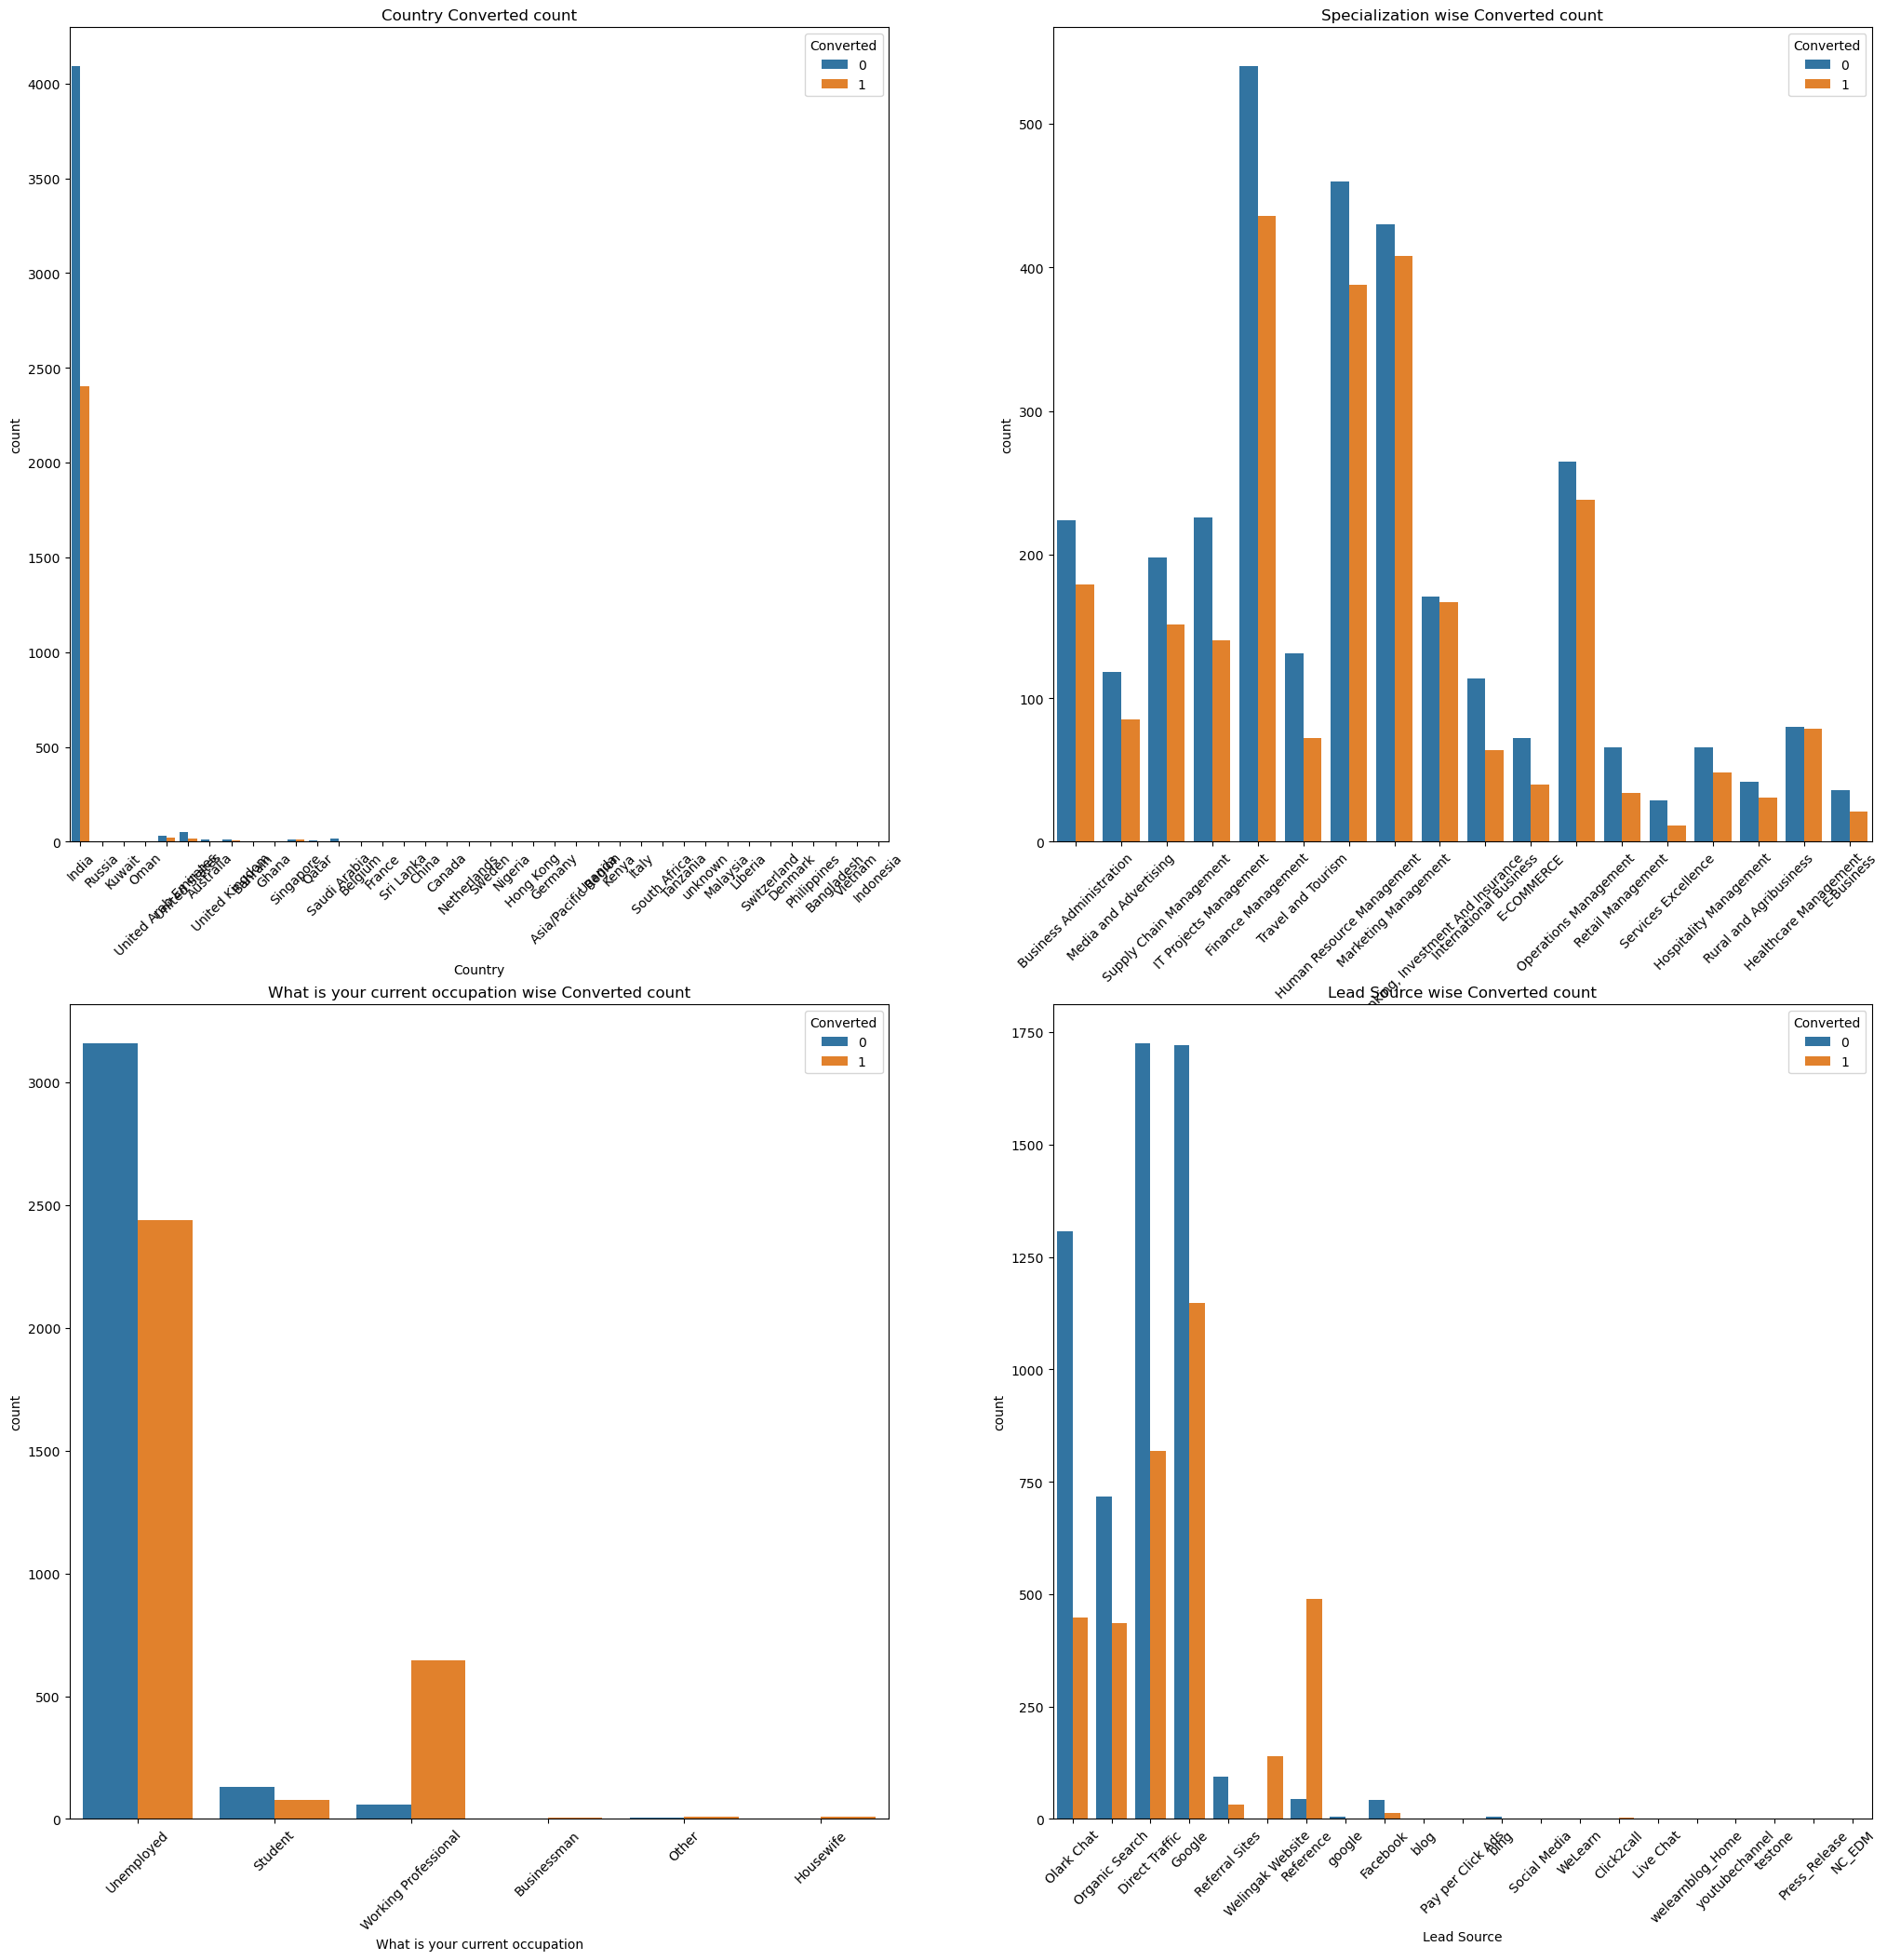

In [20]:
fig, ax = plt.subplots(2,2,figsize=(25,25))
#1 subplot-country converted count
sns.countplot(x='Country', hue='Converted', data=df2,ax=ax[0,0])
ax[0,0].set_title('Country Converted count')
for tick in ax[0,0].get_xticklabels():
    tick.set_rotation(45)
#2 subplot- specialization converted count  
sns.countplot(x='Specialization', hue='Converted', data=df2, ax=ax[0,1])
ax[0,1].set_title('Specialization wise Converted count')
for tick in ax[0,1].get_xticklabels():
    tick.set_rotation(45)    

#3 What is your current occupation wise Converted count
sns.countplot(x='What is your current occupation', hue='Converted', data=df2, ax=ax[1,0])
ax[1,0].set_title('What is your current occupation wise Converted count')
for tick in ax[1,0].get_xticklabels():
    tick.set_rotation(45)
    
#4 Lead Source wise Converted count
sns.countplot(x='Lead Source', hue='Converted', data=df2, ax=ax[1,1])
ax[1,1].set_title('Lead Source wise Converted count')
for tick in ax[1,1].get_xticklabels():
    tick.set_rotation(45)

In [18]:
cat_cols={'Last Notable Activity', 'A free copy of Mastering The Interview', 'Do Not Email', 'Lead Source', 'Last Activity', 'Lead Origin'}
drop_col={'Get updates on DM Content', 'Lead Number', 'I agree to pay the amount through cheque', 'Do Not Call', 'Receive More Updates About Our Courses', 'Magazine', 'Newspaper Article', 
'Prospect ID', 'Newspaper', 'Update me on Supply Chain Content', 'Through Recommendations', 'Search', 'Digital Advertisement', 'X Education Forums'}
#list of numerical columns
numerical_column = {'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit'}

In [24]:
df2=df2[list(numerical_column|cat_cols|target_column)]
print(df2.head(2))
print(df2.isnull().sum())

   Page Views Per Visit Last Notable Activity Do Not Email  \
0                   0.0              Modified           No   
1                   2.5          Email Opened           No   

   Total Time Spent on Website     Lead Source            Last Activity  \
0                            0      Olark Chat  Page Visited on Website   
1                          674  Organic Search             Email Opened   

   Converted A free copy of Mastering The Interview Lead Origin  TotalVisits  
0          0                                     No         API          0.0  
1          0                                     No         API          5.0  
Page Views Per Visit                      137
Last Notable Activity                       0
Do Not Email                                0
Total Time Spent on Website                 0
Lead Source                                36
Last Activity                             103
Converted                                   0
A free copy of Mastering The

In [25]:
round(100*(df2.isnull().sum()/len(df2.index)), 2)

Page Views Per Visit                      1.48
Last Notable Activity                     0.00
Do Not Email                              0.00
Total Time Spent on Website               0.00
Lead Source                               0.39
Last Activity                             1.11
Converted                                 0.00
A free copy of Mastering The Interview    0.00
Lead Origin                               0.00
TotalVisits                               1.48
dtype: float64

In [26]:
for col in cat_cols:
    df2[col].fillna(df2[col].mode()[0], inplace=True)
for col in numerical_column:
    df2[col].fillna(df2[col].mean(), inplace=True)
round(100*(df2.isnull().sum()/len(df2.index)), 2)

Page Views Per Visit                      0.0
Last Notable Activity                     0.0
Do Not Email                              0.0
Total Time Spent on Website               0.0
Lead Source                               0.0
Last Activity                             0.0
Converted                                 0.0
A free copy of Mastering The Interview    0.0
Lead Origin                               0.0
TotalVisits                               0.0
dtype: float64

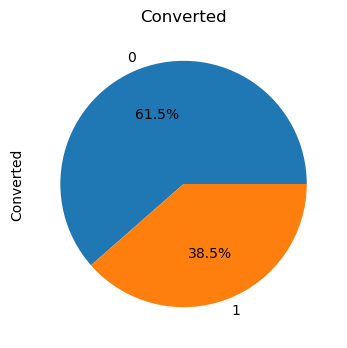

In [27]:
#make pie chart for Converted
plt.figure(figsize=(4,4))
df2['Converted'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Converted')
#dark blank font color
plt.rcParams.update({'font.size': 12, 'font.weight': 'bold', 'text.color': 'black', 'axes.labelcolor': 'black', 'xtick.color': 'black', 'ytick.color': 'black'})

plt.show()

In [28]:
def plot_box_hist(df, col):
    fig, ax = plt.subplots(1, 3, figsize=(13, 5))
    sns.boxplot(df[col], ax=ax[0])
    sns.distplot(df[col], ax=ax[1])
    sns.scatterplot(x=col, y='Converted', data=df, ax=ax[2])
    plt.show()
    
def plot_count(df, col):
    plt.figure(figsize=(25, 5))
    sns.countplot(df, x=df[col])
    #white background
    plt.style.use('seaborn-whitegrid')
    plt.xticks(rotation=90)
    plt.show()

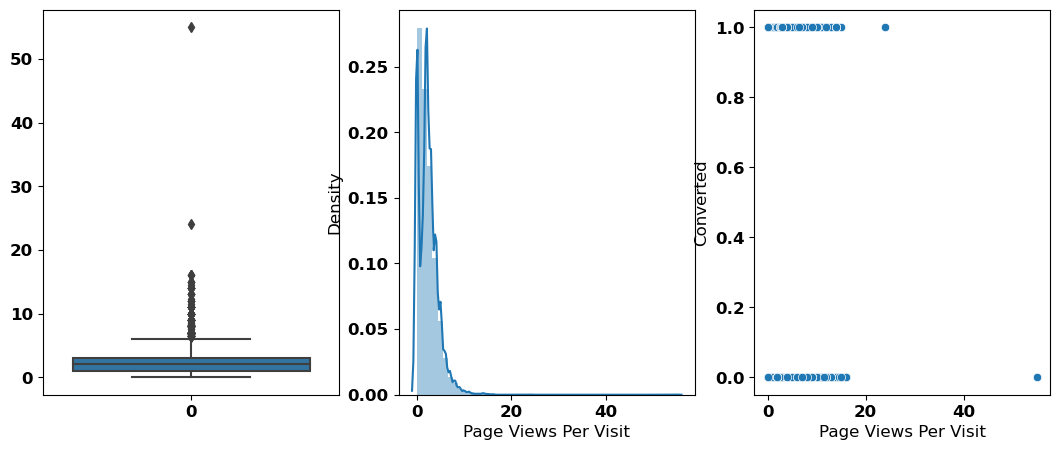

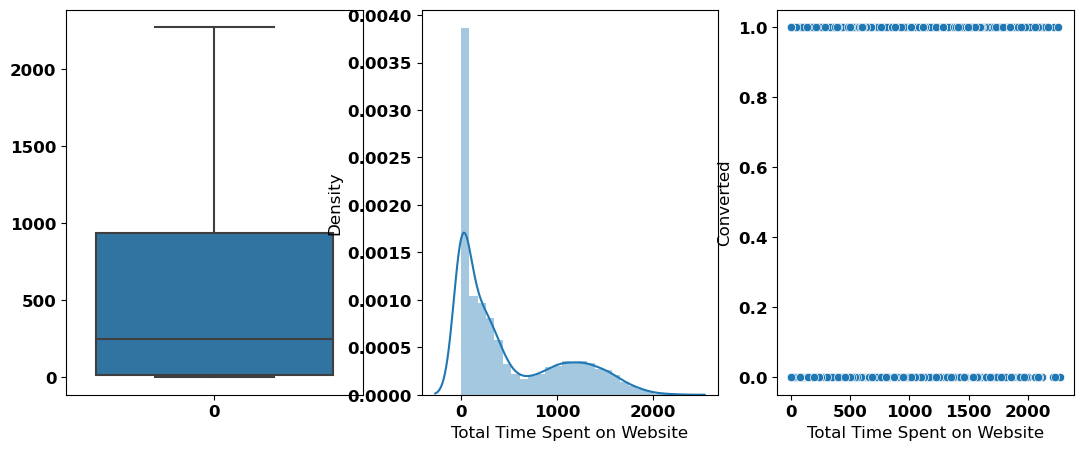

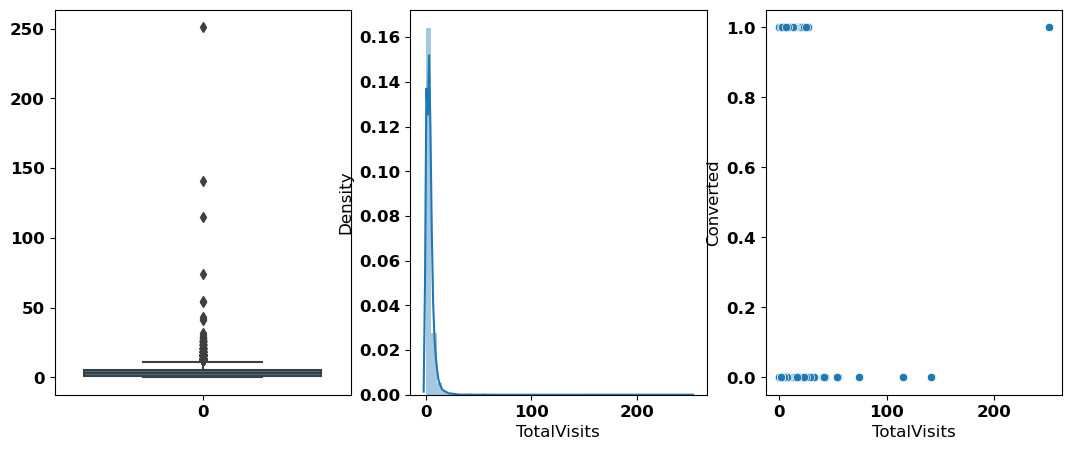

In [29]:
for col in numerical_column:
    plot_box_hist(df2, col)

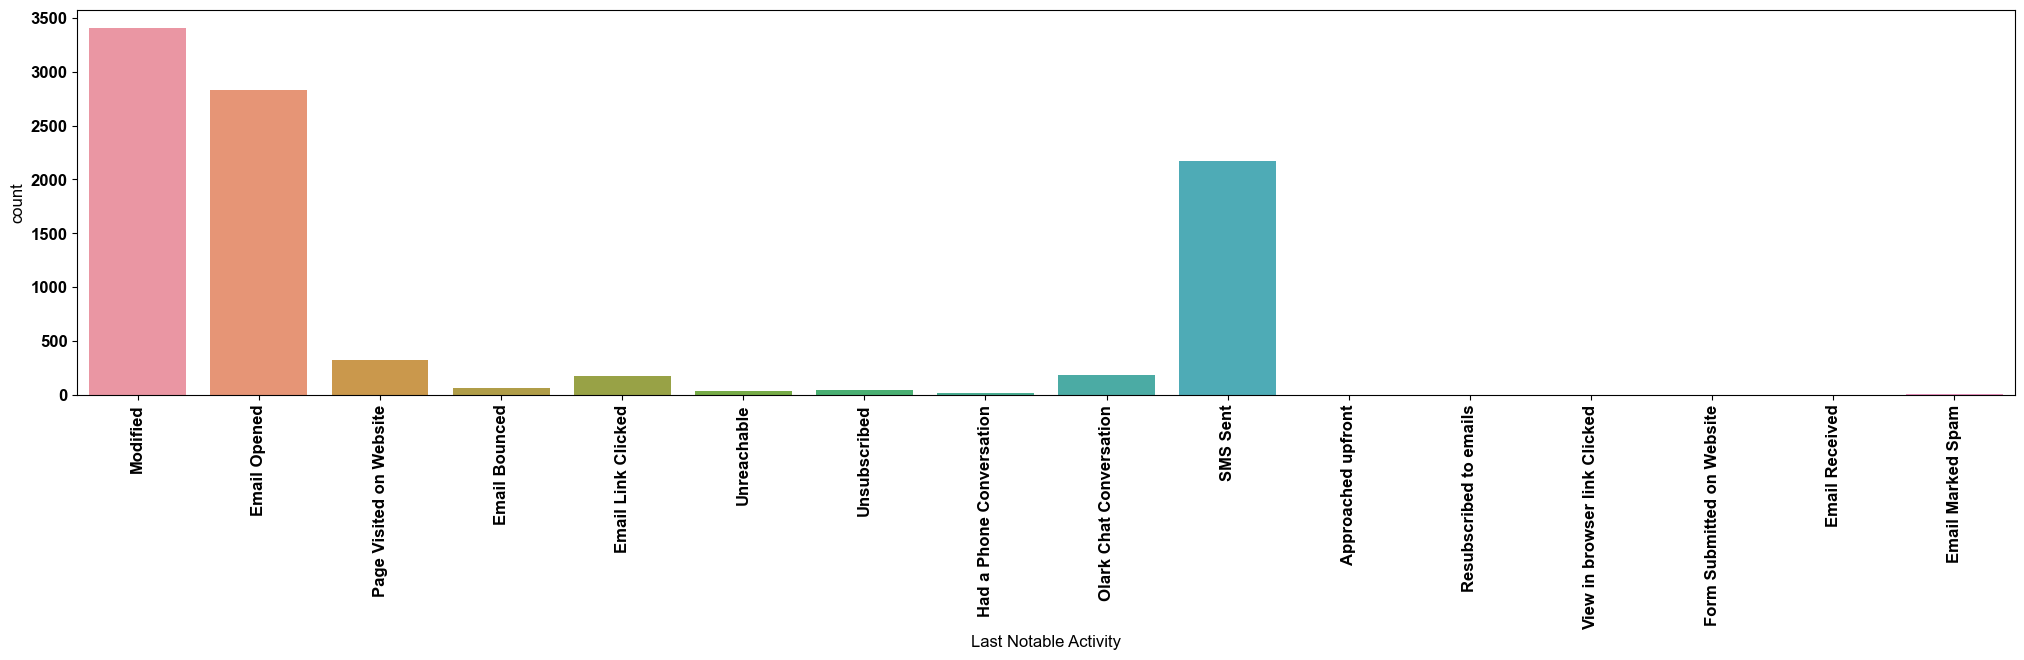

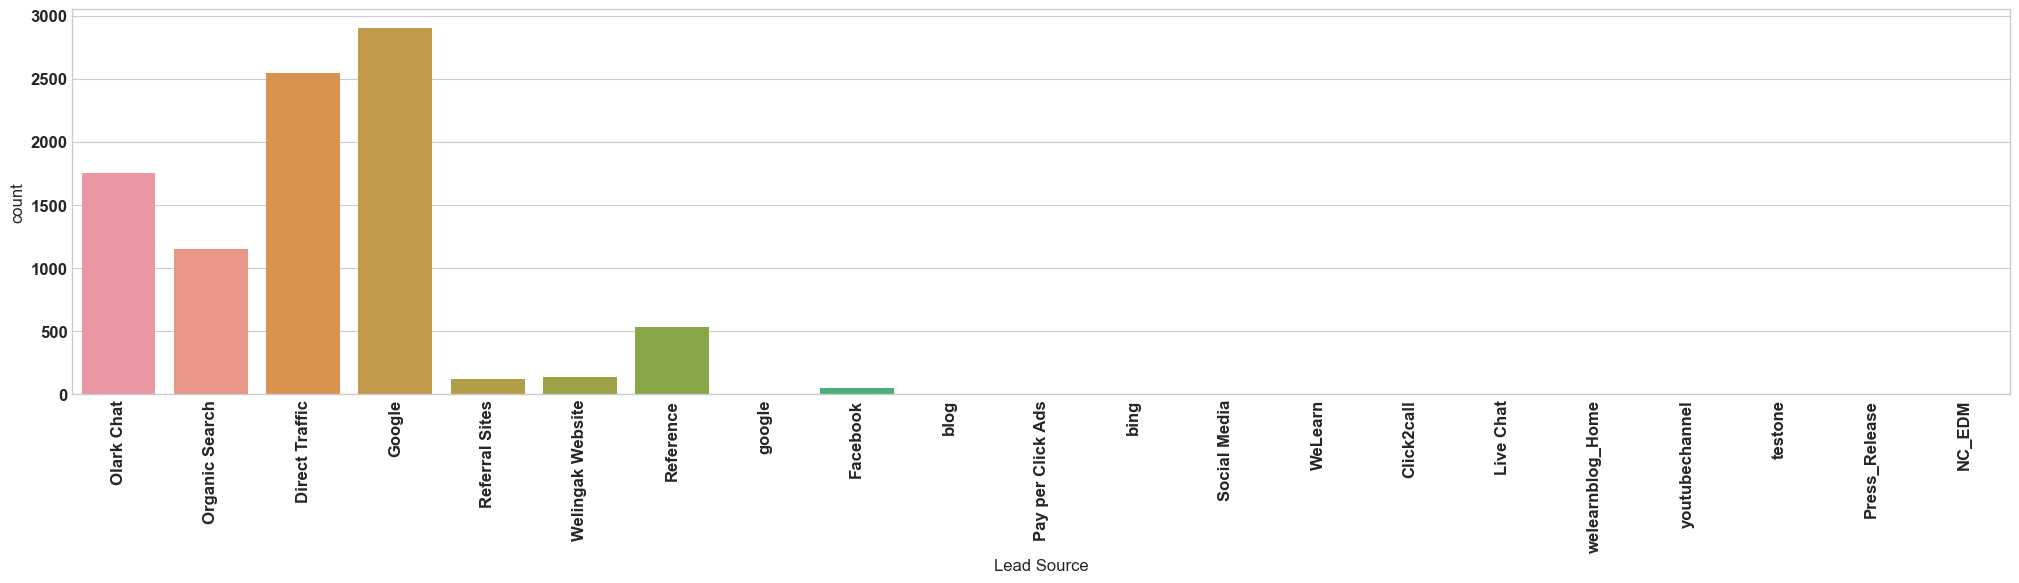

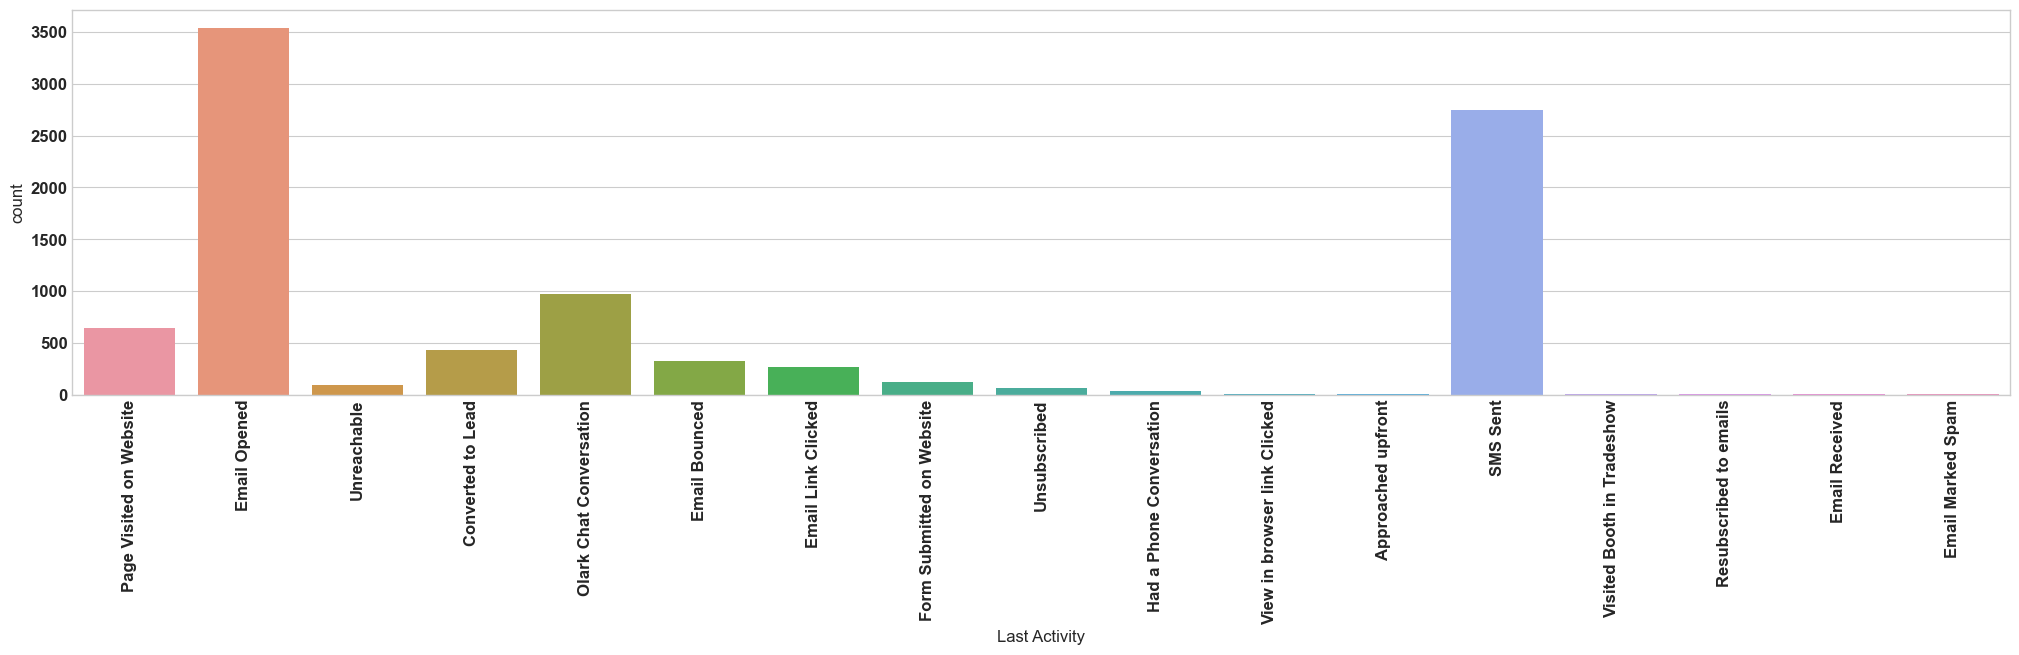

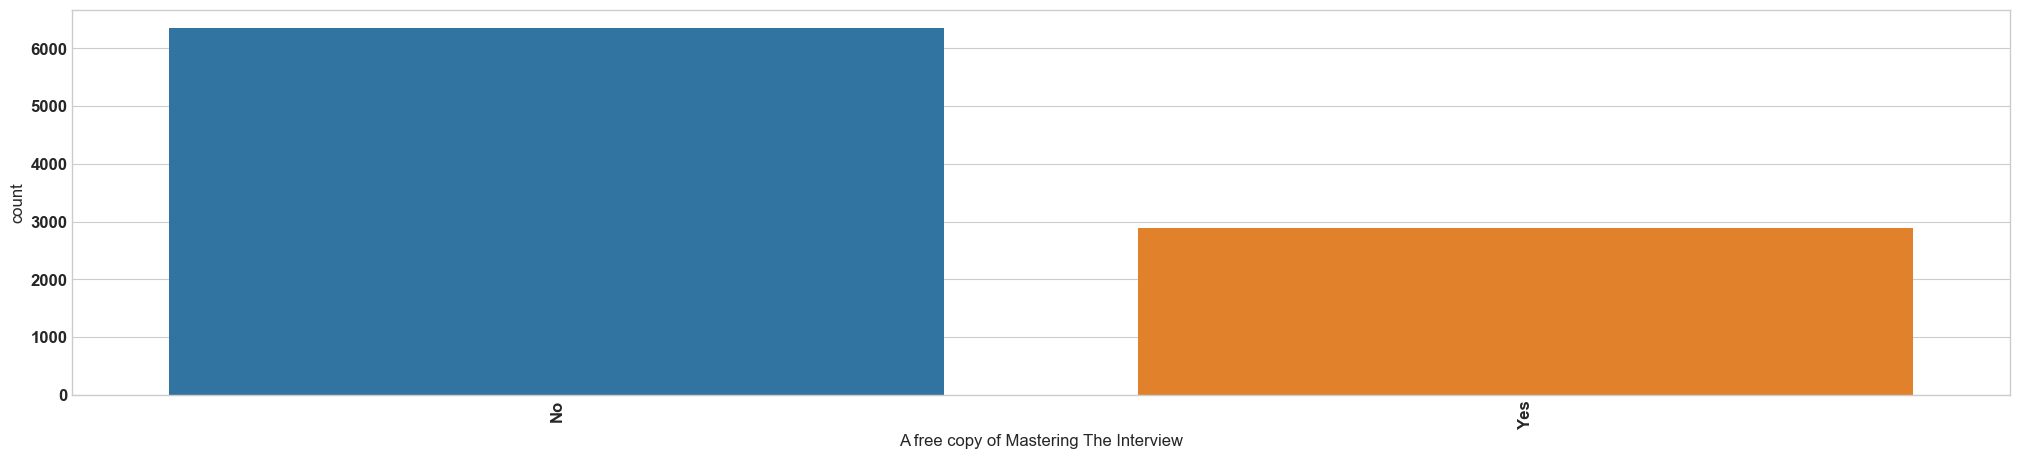

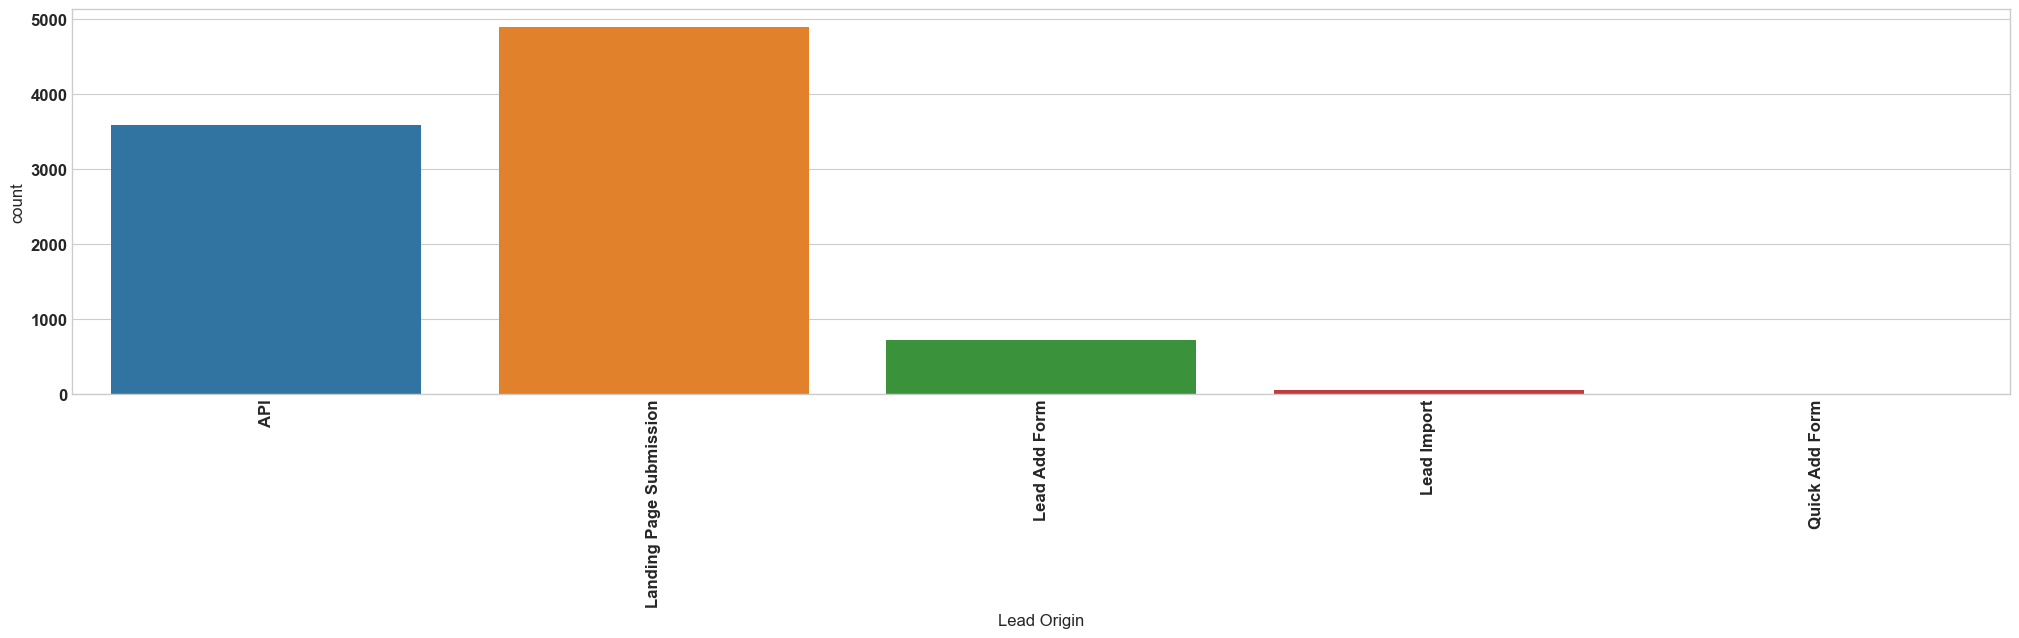

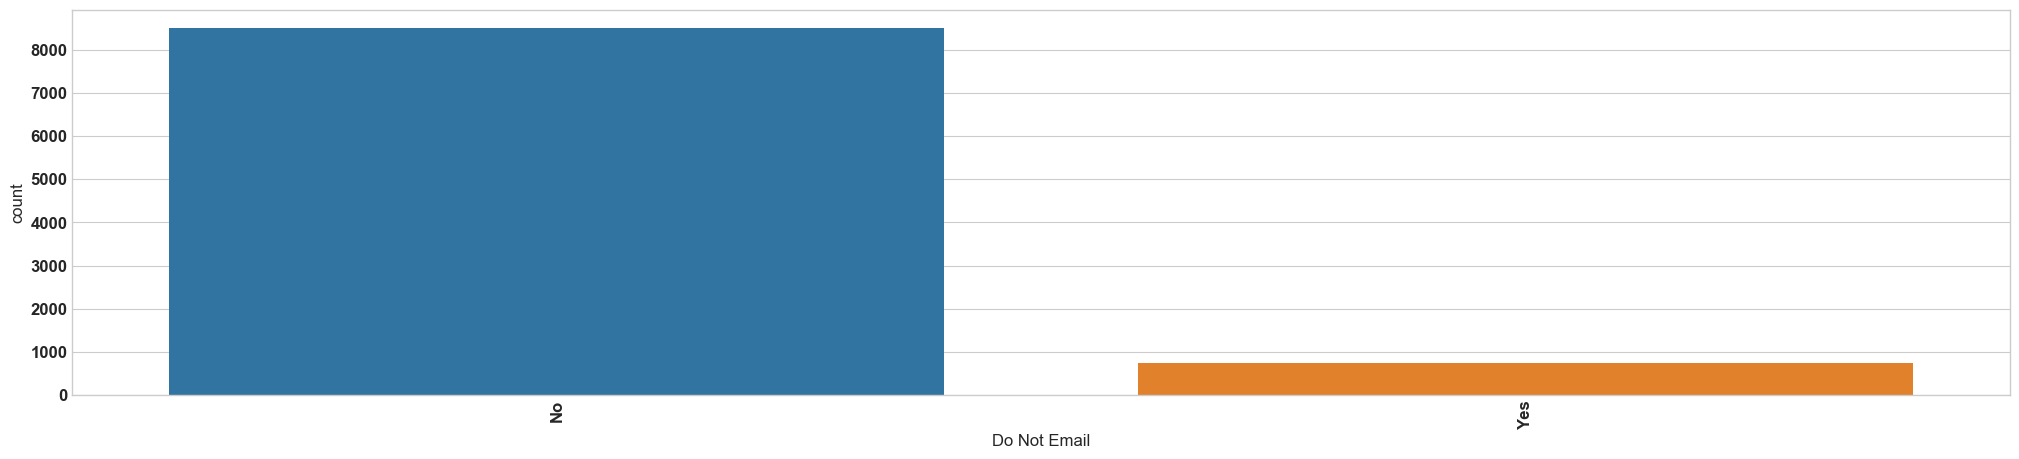

In [30]:
for col in cat_cols:
    plot_count(df2, col)

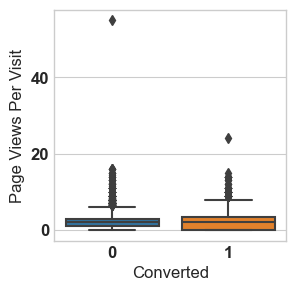

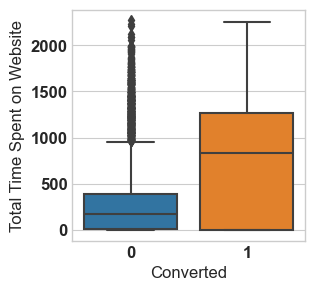

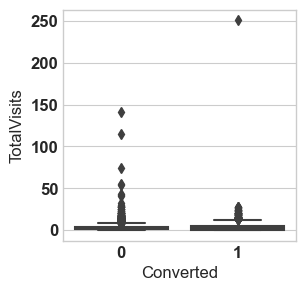

In [31]:
 def int_converted(c1,c2):
    plt.figure(figsize=(3, 3))
    ax = sns.boxplot(x=c1, y=c2, data=df2)
    
    plt.show()



for c in numerical_column:
  int_converted('Converted',c)

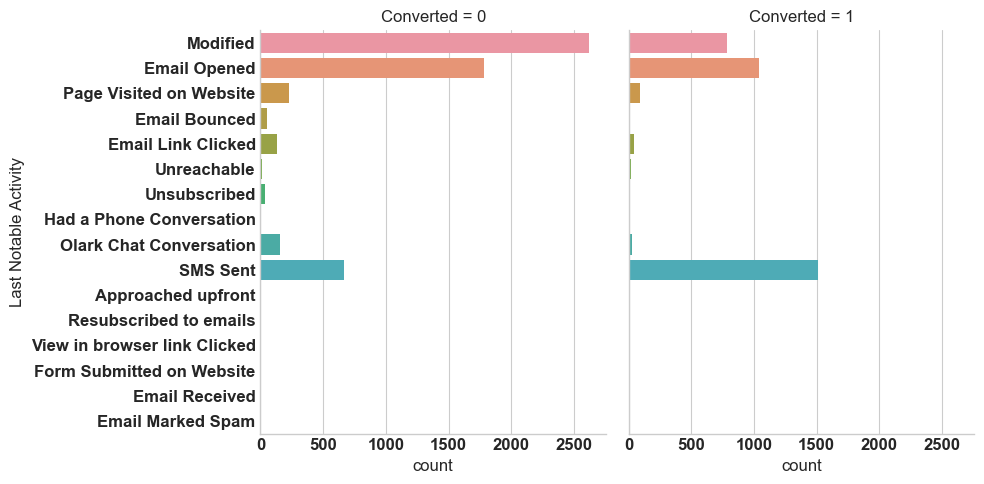

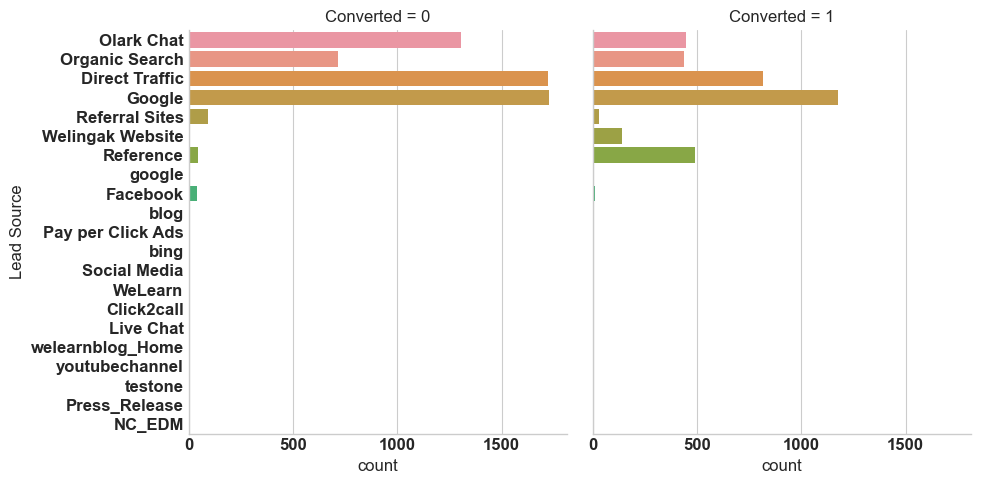

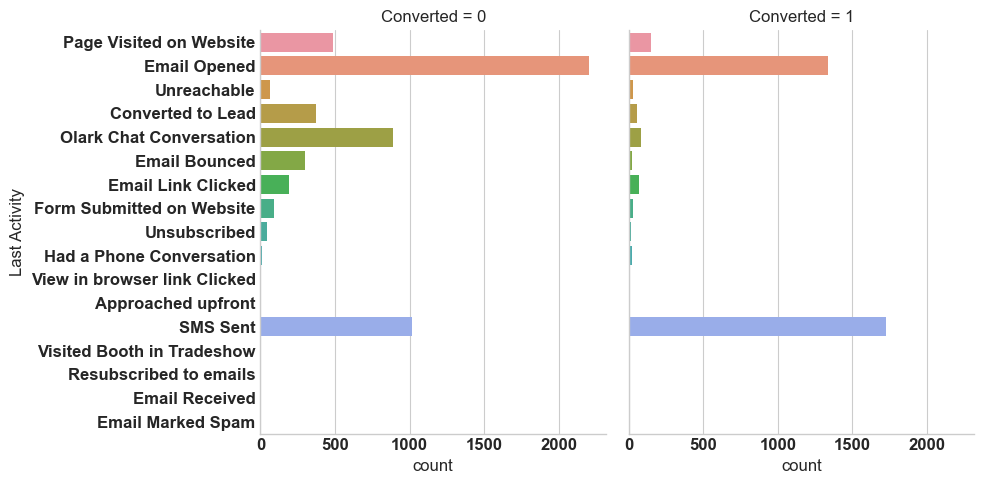

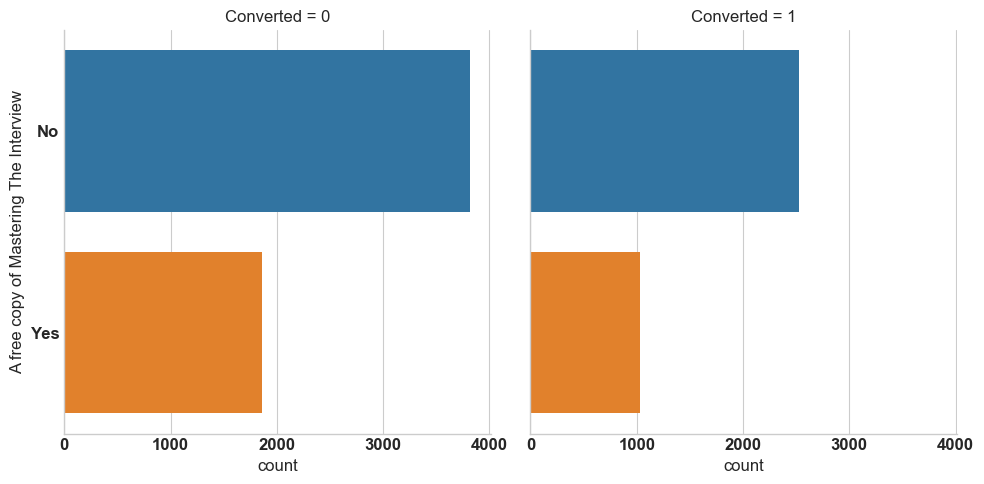

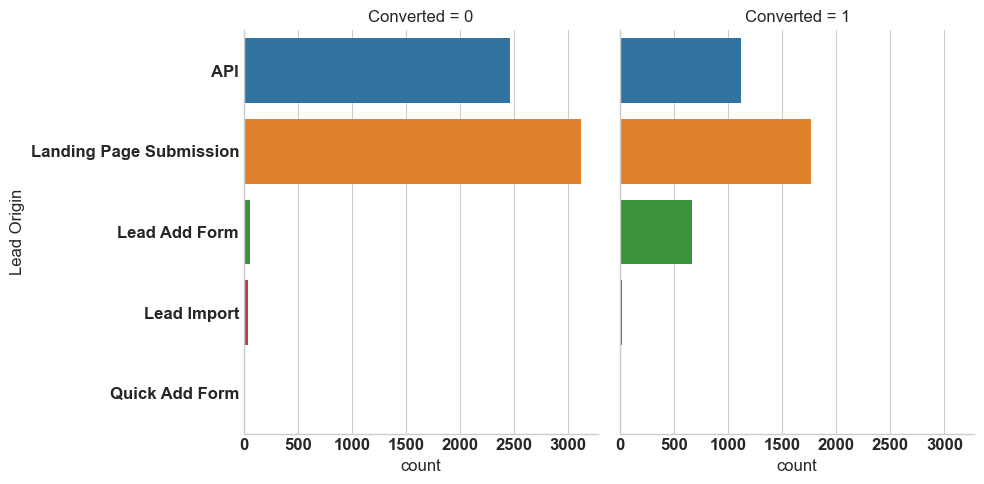

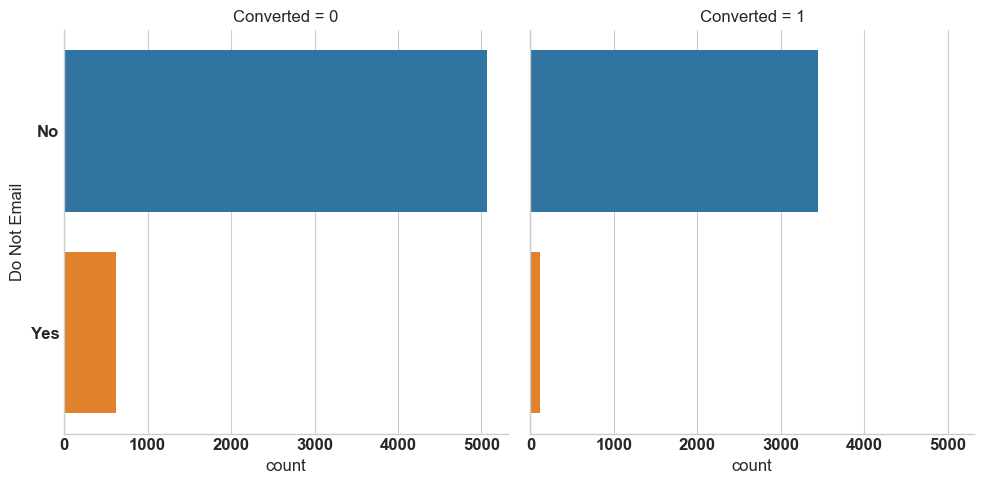

In [32]:
def cat_converted(c1,c2):
  sns.catplot(col=c1 ,y=c2, data=df2, kind="count")
  plt.show()

for c in cat_cols:
  cat_converted('Converted',c)

In [ ]:
plt.figure(figsize=(4,4))
sns.heatmap(df2.corr(), annot=True, cmap='RdYlGn')
plt.show()

In [34]:
df2.head()

,Page Views Per Visit,Last Notable Activity,Do Not Email,Total Time Spent on Website,Lead Source,Last Activity,Converted,A free copy of Mastering The Interview,Lead Origin,TotalVisits
0,0.0,Modified,No,0,Olark Chat,Page Visited on Website,0,No,API,0.0
1,2.5,Email Opened,No,674,Organic Search,Email Opened,0,No,API,5.0
2,2.0,Email Opened,No,1532,Direct Traffic,Email Opened,1,Yes,Landing Page Submission,2.0
3,1.0,Modified,No,305,Direct Traffic,Unreachable,0,No,Landing Page Submission,1.0
4,1.0,Modified,No,1428,Google,Converted to Lead,1,No,Landing Page Submission,2.0


#creating dummy variables


In [35]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 10 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Page Views Per Visit                    9240 non-null   float64
 1   Last Notable Activity                   9240 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Total Time Spent on Website             9240 non-null   int64  
 4   Lead Source                             9240 non-null   object 
 5   Last Activity                           9240 non-null   object 
 6   Converted                               9240 non-null   int64  
 7   A free copy of Mastering The Interview  9240 non-null   object 
 8   Lead Origin                             9240 non-null   object 
 9   TotalVisits                             9240 non-null   float64
dtypes: float64(2), int64(2), object(6)
memory usage: 722.0+ KB


In [36]:
#creating dummy variables for categorical columns
df_cat_dummy=pd.get_dummies(df2[cat_cols], drop_first=True)
df_cat_dummy.describe()

,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,...,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,A free copy of Mastering The Interview_Yes,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Do Not Email_Yes
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,...,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.006494,0.018723,0.000216,0.305952,0.000108,0.000108,0.001515,0.368723,0.019805,0.034416,...,0.010065,0.006602,0.000649,0.000108,0.312554,0.528788,0.077706,0.005952,0.000108,0.079437
std,0.080325,0.135552,0.014711,0.460835,0.010403,0.010403,0.038898,0.482485,0.139338,0.182304,...,0.099823,0.080987,0.025475,0.010403,0.463559,0.499198,0.267722,0.076926,0.010403,0.270435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


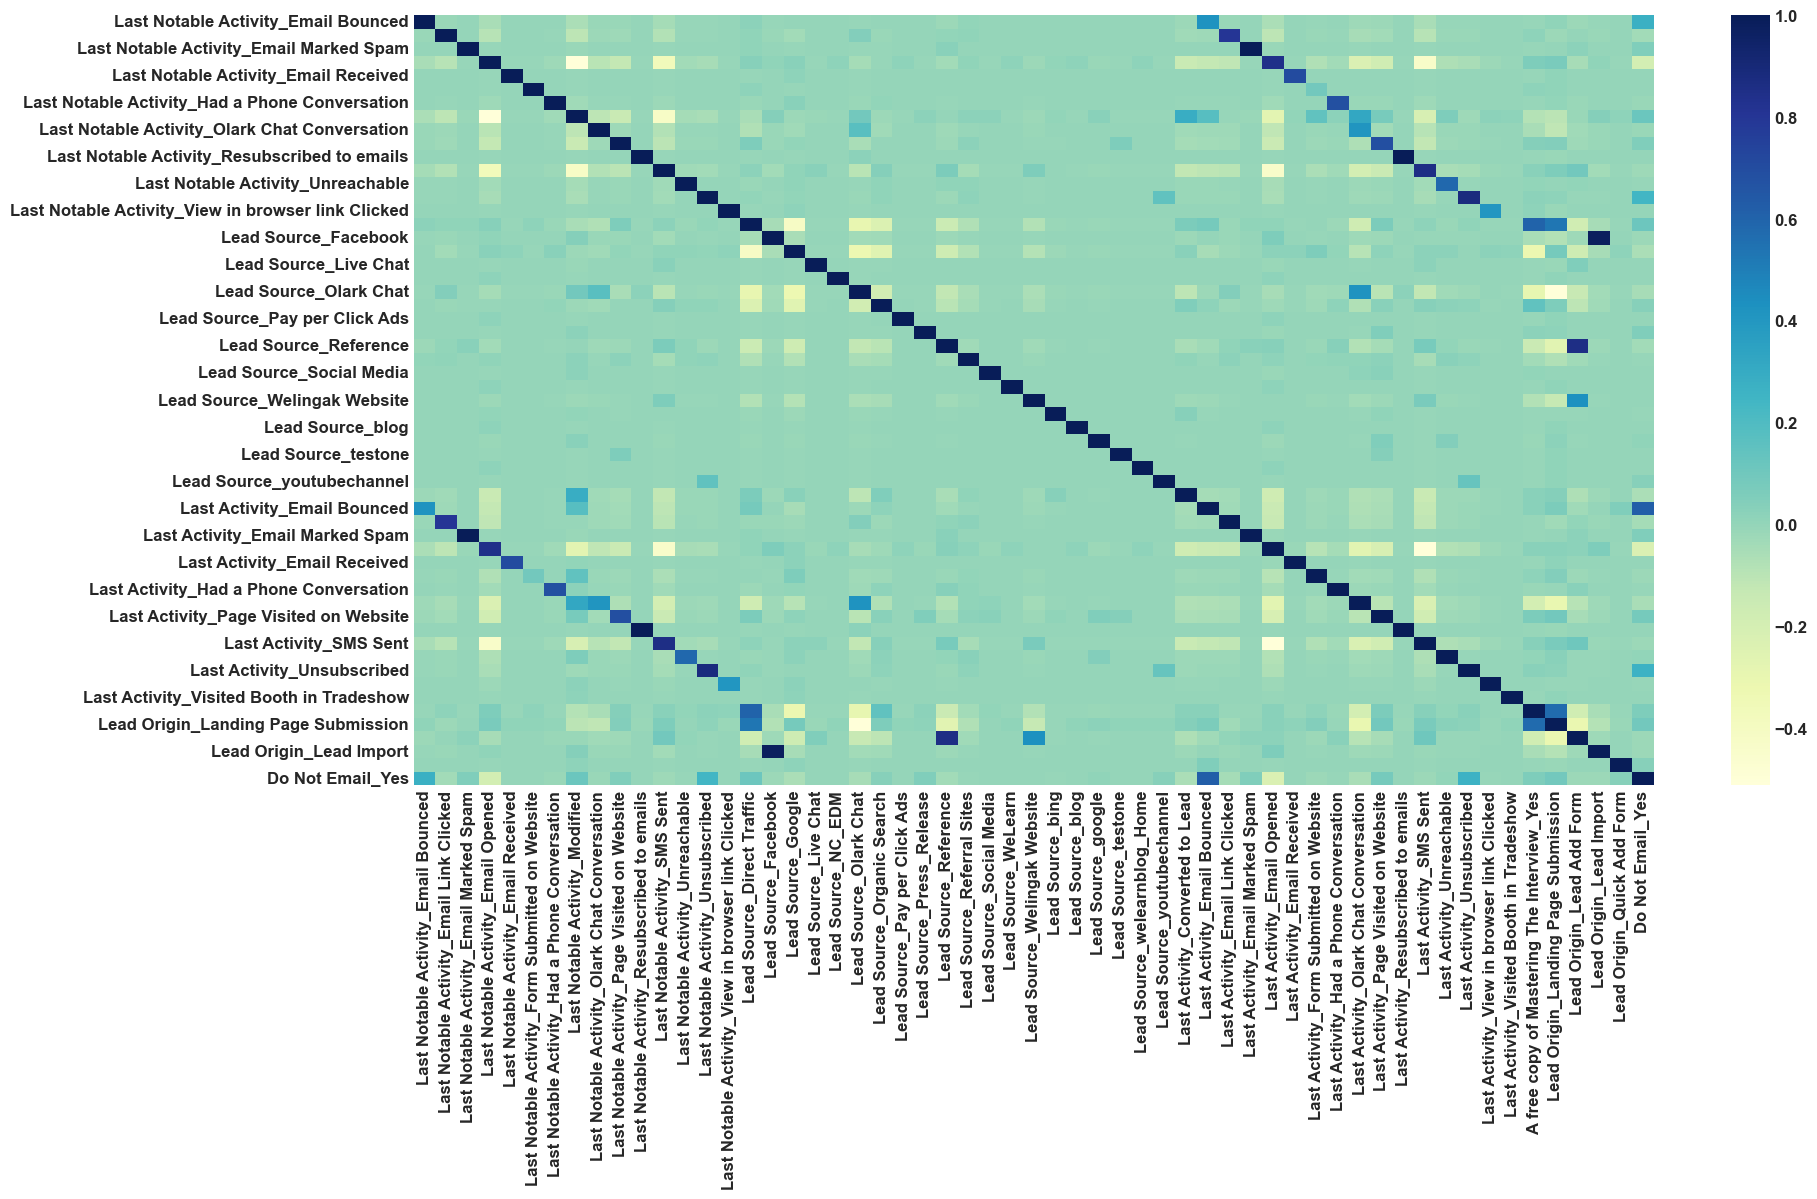

In [37]:
plt.figure(figsize=(20,10))
sns.heatmap(df_cat_dummy.corr(),  cmap='YlGnBu')
plt.show()

In [38]:
df2=pd.concat([df2,df_cat_dummy],axis=1)
#drop orignal categorical columns
df2=df2.drop(cat_cols,axis=1)
df2.head(2)

,Page Views Per Visit,Total Time Spent on Website,Converted,TotalVisits,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,...,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,A free copy of Mastering The Interview_Yes,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Do Not Email_Yes
0,0.0,0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2.5,674,0,5.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
outlier=np.abs(stats.zscore(df2))
df_outlier=df2[(outlier>3).any(axis=1)]

df2=df2[(outlier<3).all(axis=1)]
df2.shape

(5973, 61)

In [40]:
#NORMALIZING OF CONTINUOS VARIABLES
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#numariacal columns
num_col=['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
#fit and transform
df2[num_col] = scaler.fit_transform(df2[num_col])
df2.head(2)

,Page Views Per Visit,Total Time Spent on Website,Converted,TotalVisits,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,...,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,A free copy of Mastering The Interview_Yes,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Do Not Email_Yes
1,0.046641,0.264768,0,0.621542,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.224678,1.796293,1,-0.467313,0,0,0,1,0,0,...,0,0,0,0,1,1,0,0,0,0


In [41]:
#Model building
#splitting the data into train and test
from sklearn.model_selection import train_test_split
# Putting feature variable to X
X = df2.drop(['Converted'], axis=1)
# Putting response variable to y
y = df2['Converted']
#splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

#lets check the shape of train and test data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4181, 60)
(1792, 60)
(4181,)
(1792,)


In [42]:
from turtle import st


lm = LogisticRegression(max_iter=1000, random_state=100, class_weight='balanced')
lm.fit(X_train, y_train)
rfe = RFE(estimator=lm, n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

#col with rfe support true
col = X_train.columns[rfe.support_]
#col with rfe support false
nots = X_train.columns[~rfe.support_]

#print both col
print(col)
print(nots)

Index(['Page Views Per Visit', 'Total Time Spent on Website', 'TotalVisits',
       'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Marked Spam',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Email Received',
       'Last Notable Activity_Modified', 'Last Notable Activity_SMS Sent',
       'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_testone', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'A free copy of Mastering The Interview_Yes',
       'Lead Origin_Landing Page Submission'],
      dtype='object')
Index(['Last Notable Activity_Form Submitted on Website',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
    

In [43]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Page Views Per Visit', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('TotalVisits', True, 1),
 ('Last Notable Activity_Email Bounced', True, 1),
 ('Last Notable Activity_Email Link Clicked', True, 1),
 ('Last Notable Activity_Email Marked Spam', True, 1),
 ('Last Notable Activity_Email Opened', True, 1),
 ('Last Notable Activity_Email Received', True, 1),
 ('Last Notable Activity_Form Submitted on Website', False, 10),
 ('Last Notable Activity_Had a Phone Conversation', False, 12),
 ('Last Notable Activity_Modified', True, 1),
 ('Last Notable Activity_Olark Chat Conversation', False, 16),
 ('Last Notable Activity_Page Visited on Website', False, 18),
 ('Last Notable Activity_Resubscribed to emails', False, 20),
 ('Last Notable Activity_SMS Sent', True, 1),
 ('Last Notable Activity_Unreachable', False, 24),
 ('Last Notable Activity_Unsubscribed', False, 26),
 ('Last Notable Activity_View in browser link Clicked', False, 25),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead 

In [44]:
fin_col=['Total Time Spent on Website', 'TotalVisits', 'Last Activity_Page Visited on Website', 'Last Activity_Email Opened', 
'Lead Source_Olark Chat', 'Last Notable Activity_SMS Sent', 'Last Notable Activity_View in browser link Clicked', 'Page Views Per Visit', 'Lead Origin_Landing Page Submission', 
'Last Notable Activity_Email Marked Spam', 'Last Activity_Had a Phone Conversation', 'Lead Source_Google', 'Last Activity_Form Submitted on Website', 'A free copy of Mastering The Interview_Yes', 
'Last Notable Activity_Unsubscribed', 'Last Activity_Email Received', 'Last Notable Activity_Modified', 'Last Activity_SMS Sent', 'Lead Source_bing', 'Last Activity_Olark Chat Conversation']

In [45]:
not_selected=['Lead Source_Facebook', 'Last Notable Activity_Olark Chat Conversation', 'Do Not Email_Yes', 'Last Activity_Visited Booth in Tradeshow', 'Lead Source_Pay per Click Ads',
 'Last Activity_View in browser link Clicked', 'Last Notable Activity_Form Submitted on Website', 'Last Activity_Email Bounced', 'Lead Source_welearnblog_Home', 'Lead Source_Organic Search',
 'Lead Source_WeLearn', 'Last Activity_Resubscribed to emails', 'Last Activity_Converted to Lead', 'Last Notable Activity_Unreachable', 'Last Notable Activity_Page Visited on Website', 'Last Notable Activity_Resubscribed to emails', 'Last Notable Activity_Email Opened',
 'Lead Origin_Lead Add Form', 'Lead Source_Referral Sites', 'Lead Source_blog', 'Lead Source_Welingak Website', 'Lead Source_NC_EDM', 'Last Notable Activity_Had a Phone Conversation',
 'Lead Origin_Quick Add Form', 'Lead Origin_Lead Import', 'Lead Source_Social Media', 'Last Activity_Email Link Clicked', 'Last Activity_Unsubscribed', 'Lead Source_google',
 'Last Notable Activity_Email Bounced', 'Last Activity_Email Marked Spam', 'Last Notable Activity_Email Received', 'Lead Source_Direct Traffic', 'Lead Source_Press_Release', 'Lead Source_Reference',
 'Lead Source_testone', 'Last Notable Activity_Email Link Clicked', 'Last Activity_Unreachable', 'Lead Source_youtubechannel', 'Lead Source_Live Chat']


In [47]:
X_train_1= X_train[fin_col]

lm = LogisticRegression(max_iter=1000, random_state=100, class_weight='balanced')
lm.fit(X_train_1, y_train)
rfe = RFE(estimator=lm, n_features_to_select=20)
rfe = rfe.fit(X_train_1, y_train)
list(zip(X_train_1.columns,rfe.support_,rfe.ranking_))

col = X_train_1.columns[rfe.support_]
#col with rfe support false
nots = X_train_1.columns[~rfe.support_]

#print both col
print(col)
print(nots)
print(len(fin_col))

Index(['Total Time Spent on Website', 'TotalVisits',
       'Last Activity_Page Visited on Website', 'Last Activity_Email Opened',
       'Lead Source_Olark Chat', 'Last Notable Activity_SMS Sent',
       'Last Notable Activity_View in browser link Clicked',
       'Page Views Per Visit', 'Lead Origin_Landing Page Submission',
       'Last Notable Activity_Email Marked Spam',
       'Last Activity_Had a Phone Conversation', 'Lead Source_Google',
       'Last Activity_Form Submitted on Website',
       'A free copy of Mastering The Interview_Yes',
       'Last Notable Activity_Unsubscribed', 'Last Activity_Email Received',
       'Last Notable Activity_Modified', 'Last Activity_SMS Sent',
       'Lead Source_bing', 'Last Activity_Olark Chat Conversation'],
      dtype='object')
Index([], dtype='object')
20


In [48]:
#model building using statsmodel
import statsmodels.api as sm
#create function
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
    res = logm1.fit()
    print(res.summary())
    print("-vif-"*20)

    vif = pd.DataFrame()
    vif['Features'] = X_train[cols].columns
    vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)
    print("---roc---"*20)
    #predict
    y_train_pred = res.predict(X_train_sm).values.reshape(-1)
    y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
    y_train_pred_final['Lead Number'] = y_train.index
    y_train_pred_final.head()
    #create new column
    y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
    #confusion matrix
    conf = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
    create_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)
    #print accuracy
    print("Accuracy",metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))
    #print sensitivity
    print("Sensitivity",conf[1,1]/(conf[1,0]+conf[1,1]))
    #print specificity
    print("Specificity",conf[0,0]/(conf[0,0]+conf[0,1]))
    #print precision
    print("Precision",conf[1,1]/(conf[0,1]+conf[1,1]))
    #print recall
    print("Recall",conf[1,1]/(conf[1,0]+conf[1,1]))
    #print f1 score
    print("F1 Score",metrics.f1_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

    return conf


In [49]:
def create_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate = False)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(20, 10))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return None

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4181
Model:                            GLM   Df Residuals:                     4168
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2018.6
Date:                Mon, 25 Dec 2023   Deviance:                       4037.3
Time:                        13:22:45   Pearson chi2:                 4.24e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.3153
Covariance Type:            nonrobust                                         
                                                         coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------

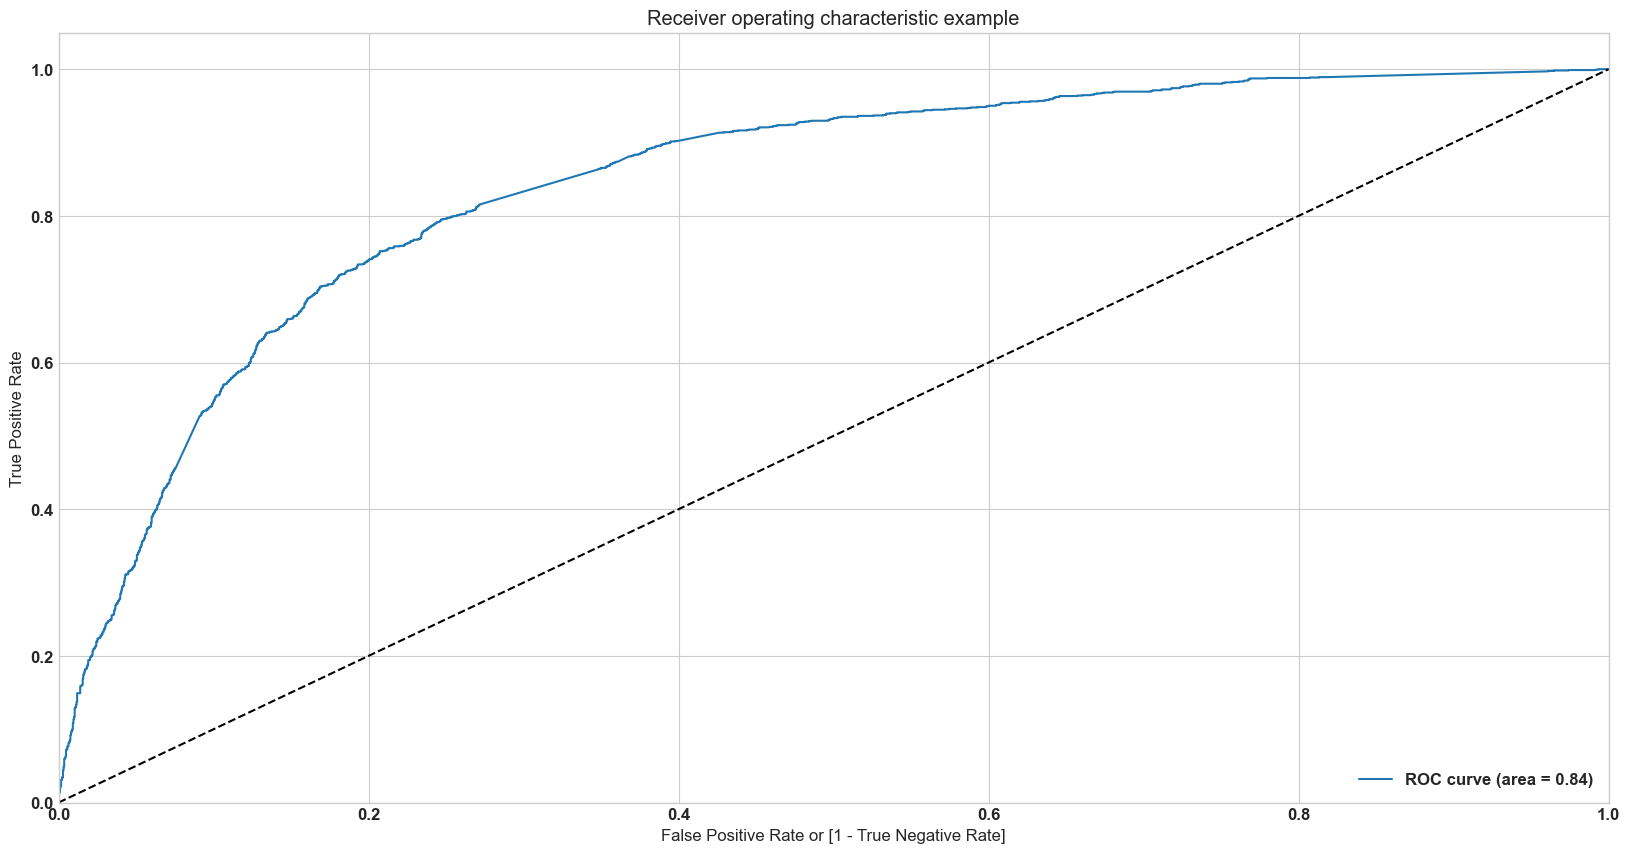

Accuracy 0.7754125807223152
Sensitivity 0.6592548076923077
Specificity 0.8522050059594756
Precision 0.7467665078284548
Recall 0.6592548076923077
F1 Score 0.7002872646026174
[[2145  372]
 [ 567 1097]]


In [50]:
con = build_model(col)
print(con)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4181
Model:                            GLM   Df Residuals:                     4168
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2018.6
Date:                Mon, 25 Dec 2023   Deviance:                       4037.3
Time:                        13:22:46   Pearson chi2:                 4.24e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.3153
Covariance Type:            nonrobust                                         
                                                         coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------

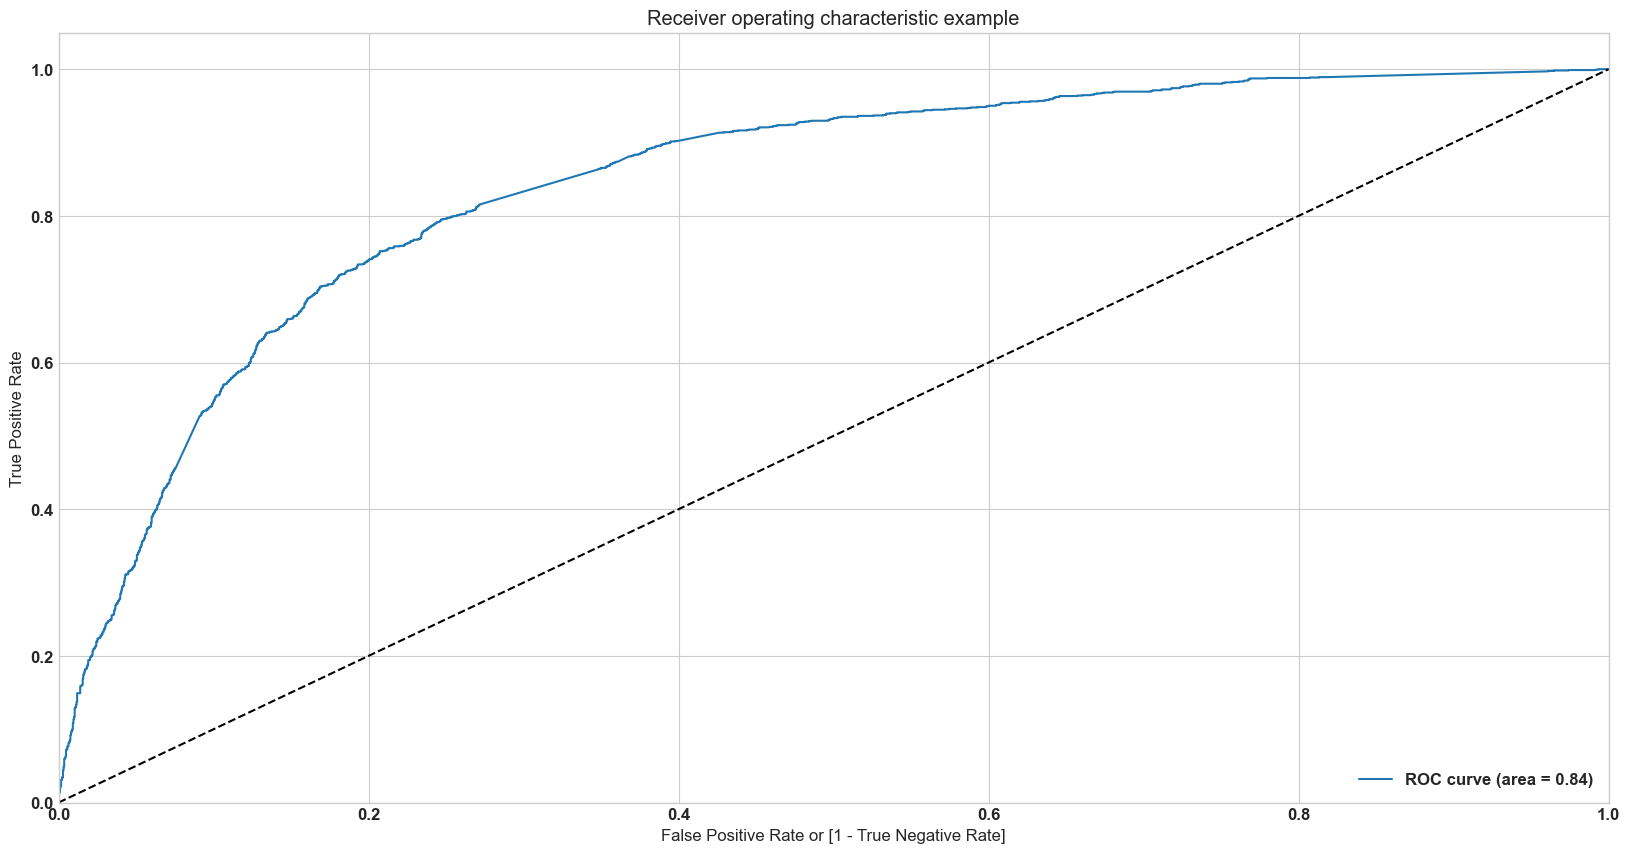

Accuracy 0.7754125807223152
Sensitivity 0.6592548076923077
Specificity 0.8522050059594756
Precision 0.7467665078284548
Recall 0.6592548076923077
F1 Score 0.7002872646026174
[[2145  372]
 [ 567 1097]]


In [51]:
col_2 = col.drop('Last Activity_Page Visited on Website', 1)
#model2
con_2 = build_model(col_2)
print(con_2)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4181
Model:                            GLM   Df Residuals:                     4169
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2022.5
Date:                Mon, 25 Dec 2023   Deviance:                       4045.1
Time:                        13:22:46   Pearson chi2:                 4.25e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3140
Covariance Type:            nonrobust                                         
                                                         coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------

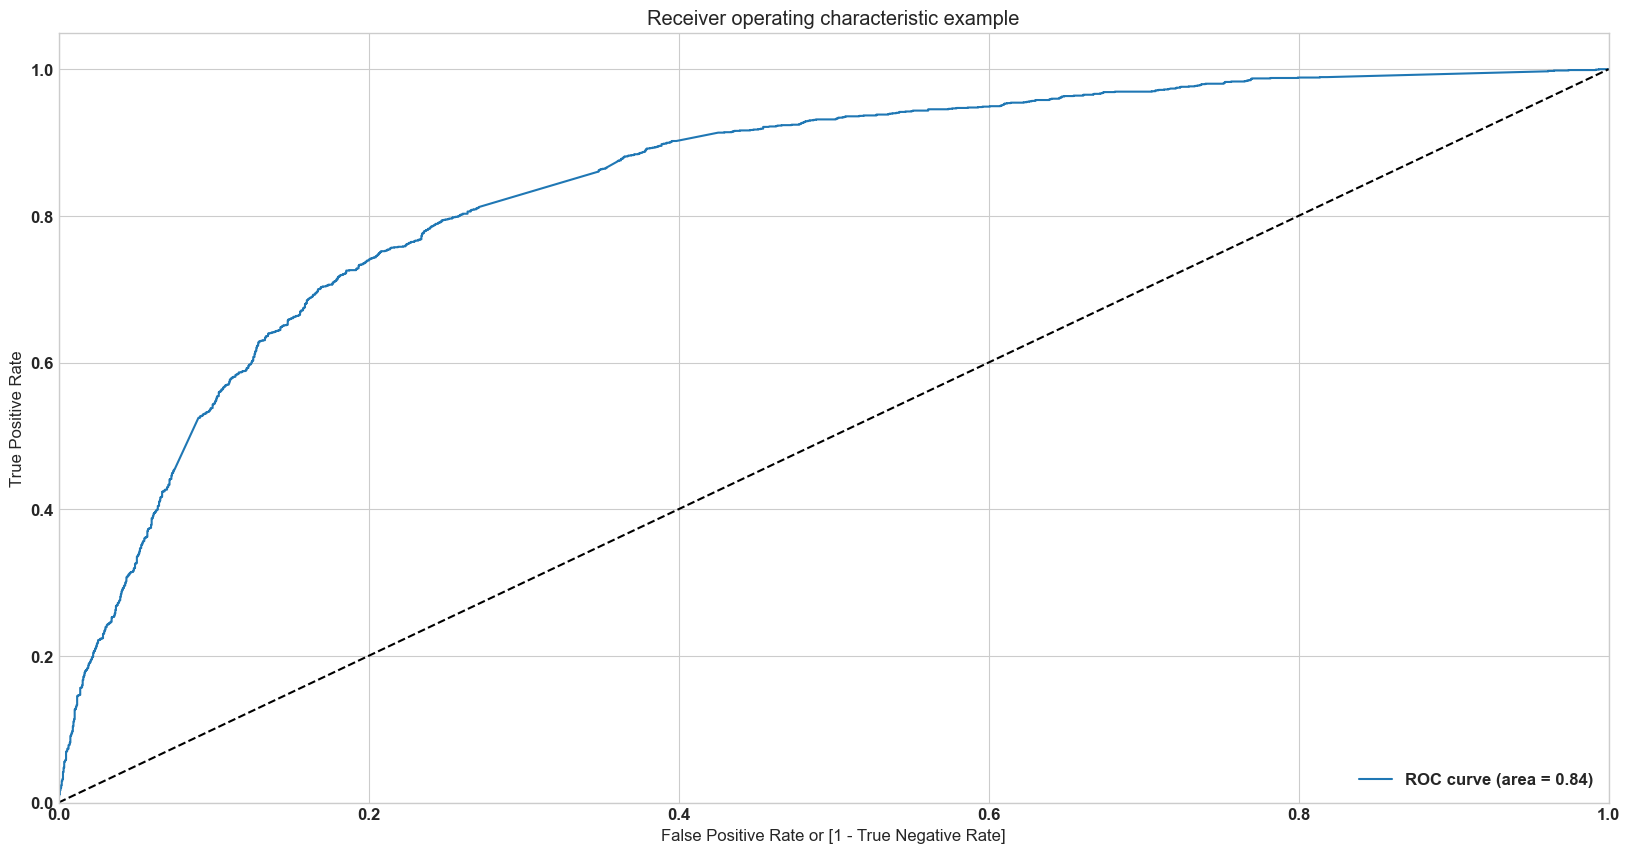

Accuracy 0.7746950490313322
Sensitivity 0.6586538461538461
Specificity 0.8514104092173223
Precision 0.745578231292517
Recall 0.6586538461538461
F1 Score 0.6994256541161455
[[2143  374]
 [ 568 1096]]


In [52]:
col_3=col_2.drop('Last Activity_SMS Sent',1)
#model3
con_3 = build_model(col_3)
print(con_3)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4181
Model:                            GLM   Df Residuals:                     4169
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2022.5
Date:                Mon, 25 Dec 2023   Deviance:                       4045.1
Time:                        13:22:47   Pearson chi2:                 4.25e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3140
Covariance Type:            nonrobust                                         
                                                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

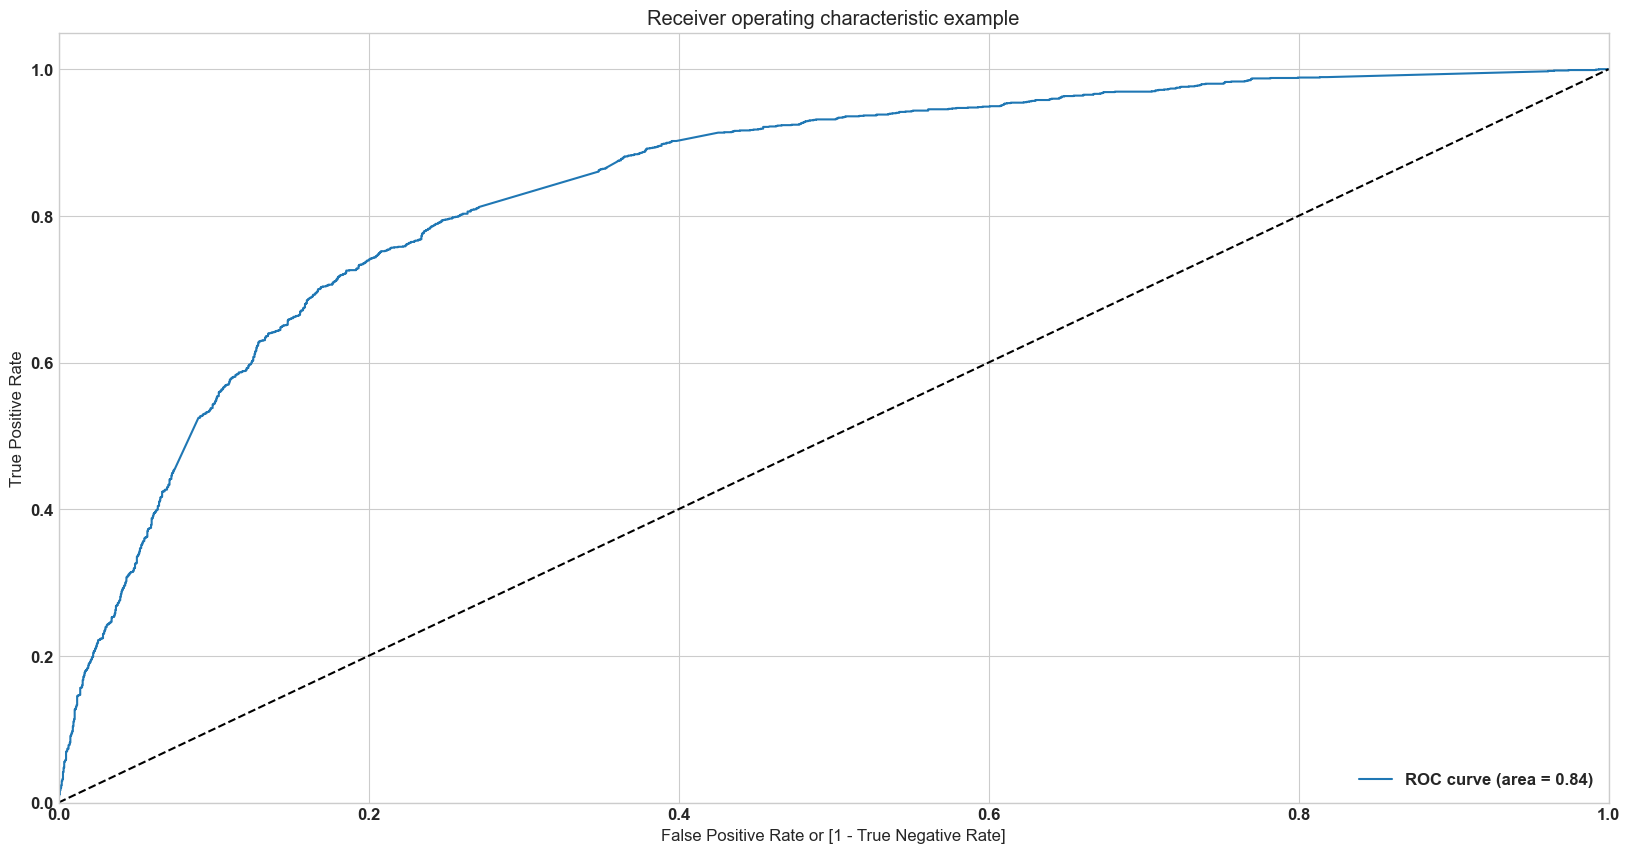

Accuracy 0.7746950490313322
Sensitivity 0.6586538461538461
Specificity 0.8514104092173223
Precision 0.745578231292517
Recall 0.6586538461538461
F1 Score 0.6994256541161455
[[2143  374]
 [ 568 1096]]


In [53]:
col_4 = col_3.drop('Last Notable Activity_View in browser link Clicked', 1)
#model4
con_4 = build_model(col_4)
print(con_4)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4181
Model:                            GLM   Df Residuals:                     4170
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2025.1
Date:                Mon, 25 Dec 2023   Deviance:                       4050.2
Time:                        13:23:30   Pearson chi2:                 4.25e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3132
Covariance Type:            nonrobust                                         
                                                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

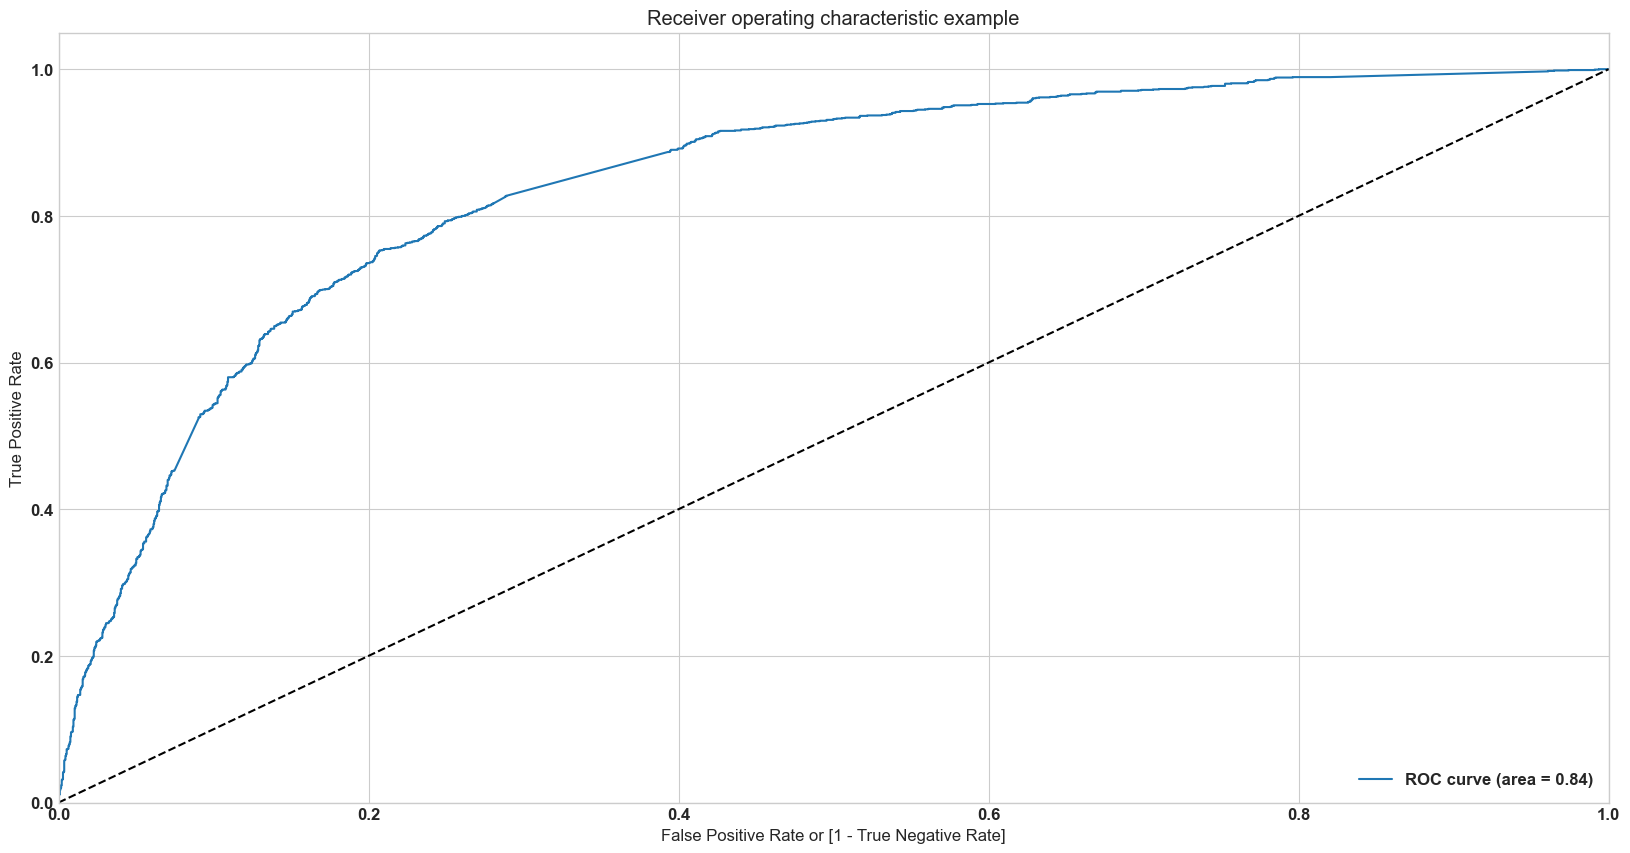

Accuracy 0.7758909351829706
Sensitivity 0.6616586538461539
Specificity 0.8514104092173223
Precision 0.7464406779661017
Recall 0.6616586538461539
F1 Score 0.701497292131252
[[2143  374]
 [ 563 1101]]


In [56]:
col_5 = col_4.drop('Last Notable Activity_Modified', 1)
#model5
conf_5 = build_model(col_5)
print(conf_5)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4181
Model:                            GLM   Df Residuals:                     4171
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2025.1
Date:                Mon, 25 Dec 2023   Deviance:                       4050.2
Time:                        13:27:59   Pearson chi2:                 4.25e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3132
Covariance Type:            nonrobust                                         
                                                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

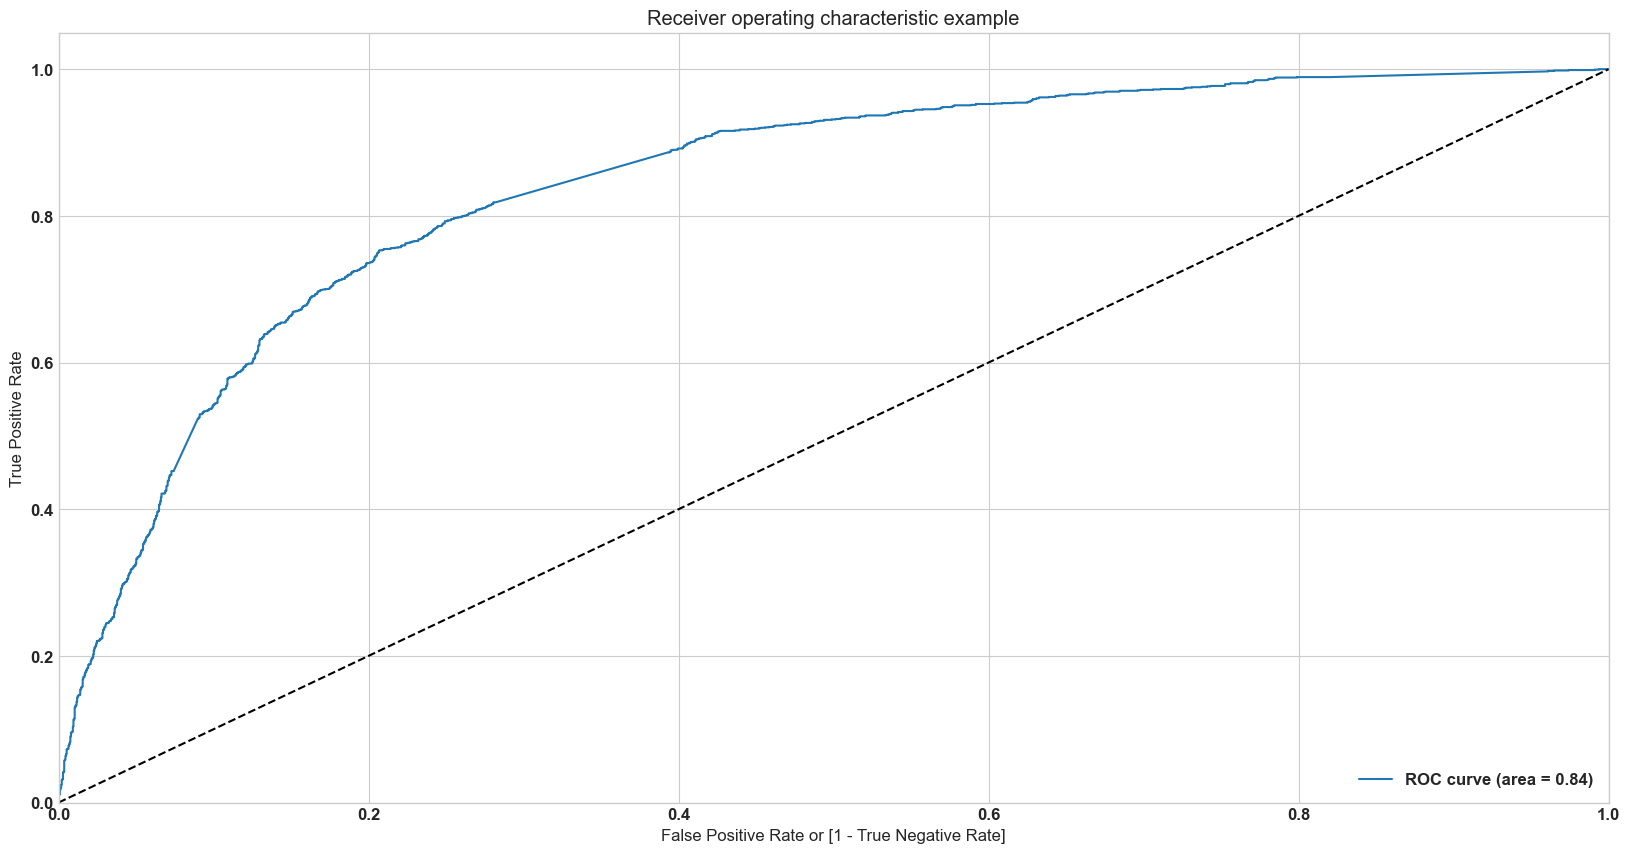

Accuracy 0.7761301124132982
Sensitivity 0.6622596153846154
Specificity 0.8514104092173223
Precision 0.7466124661246613
Recall 0.6622596153846154
F1 Score 0.7019108280254777
[[2143  374]
 [ 562 1102]]


In [57]:
col_6 = col_5.drop('Last Activity_Email Opened', 1)
#model6
conf_6 = build_model(col_6)
print(conf_6)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4181
Model:                            GLM   Df Residuals:                     4172
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2025.4
Date:                Mon, 25 Dec 2023   Deviance:                       4050.8
Time:                        13:28:32   Pearson chi2:                 4.25e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3131
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

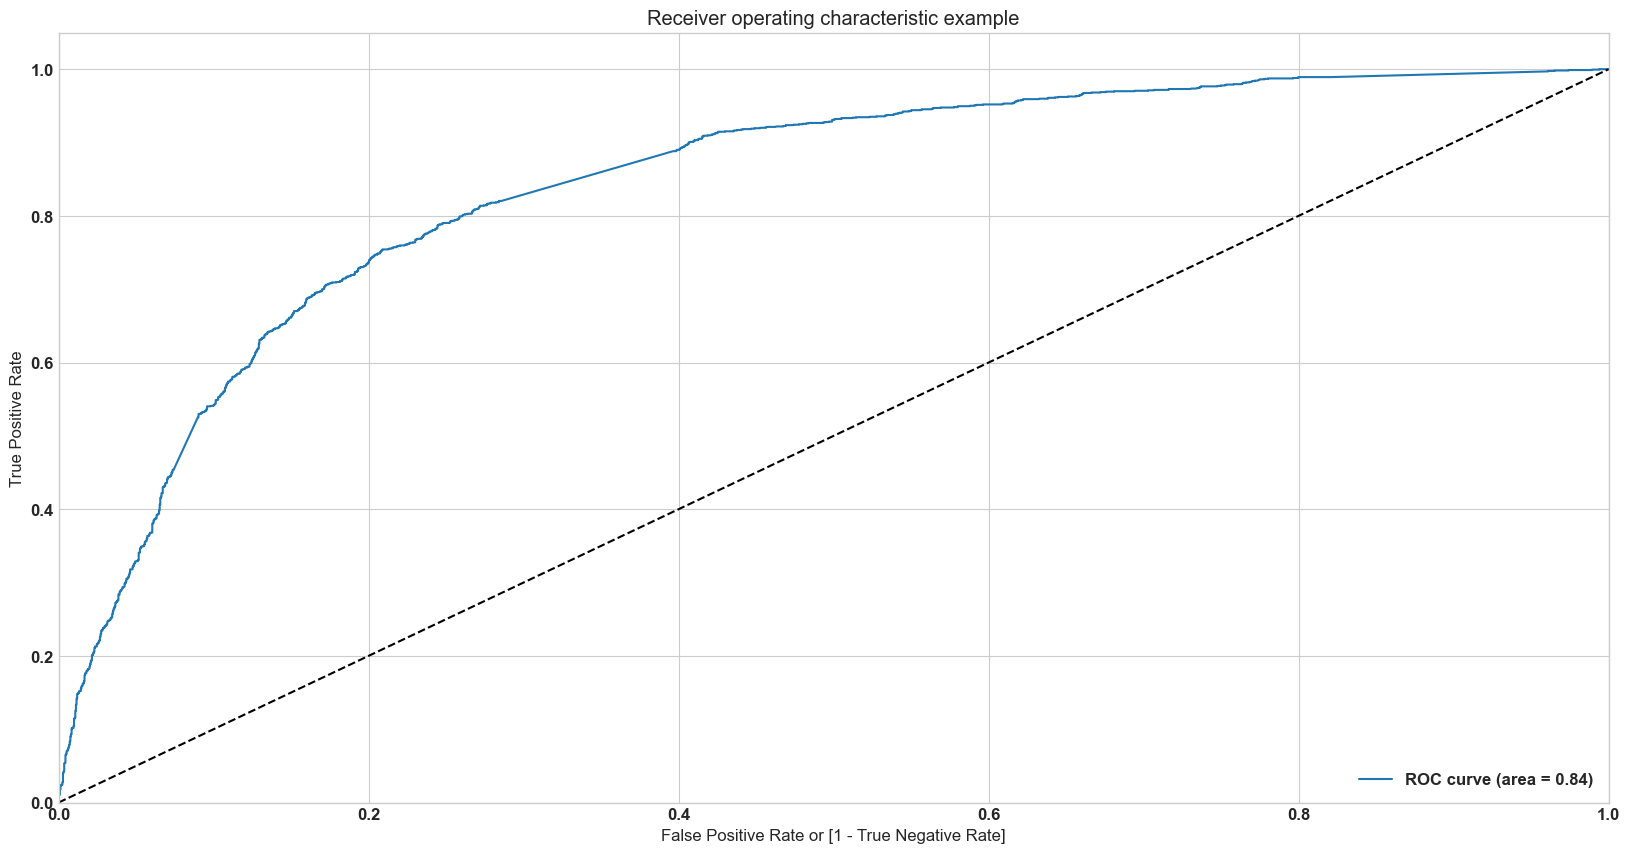

Accuracy 0.7749342262616599
Sensitivity 0.6580528846153846
Specificity 0.8522050059594756
Precision 0.7464212678936605
Recall 0.6580528846153846
F1 Score 0.6994570424784414
[[2145  372]
 [ 569 1095]]


In [58]:
col_7 = col_6.drop('A free copy of Mastering The Interview_Yes', 1)
#model7
conf_7 = build_model(col_7)
print(conf_7)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4181
Model:                            GLM   Df Residuals:                     4173
Model Family:                Binomial   Df Model:                            7
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2027.5
Date:                Mon, 25 Dec 2023   Deviance:                       4054.9
Time:                        13:28:53   Pearson chi2:                 4.27e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3124
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

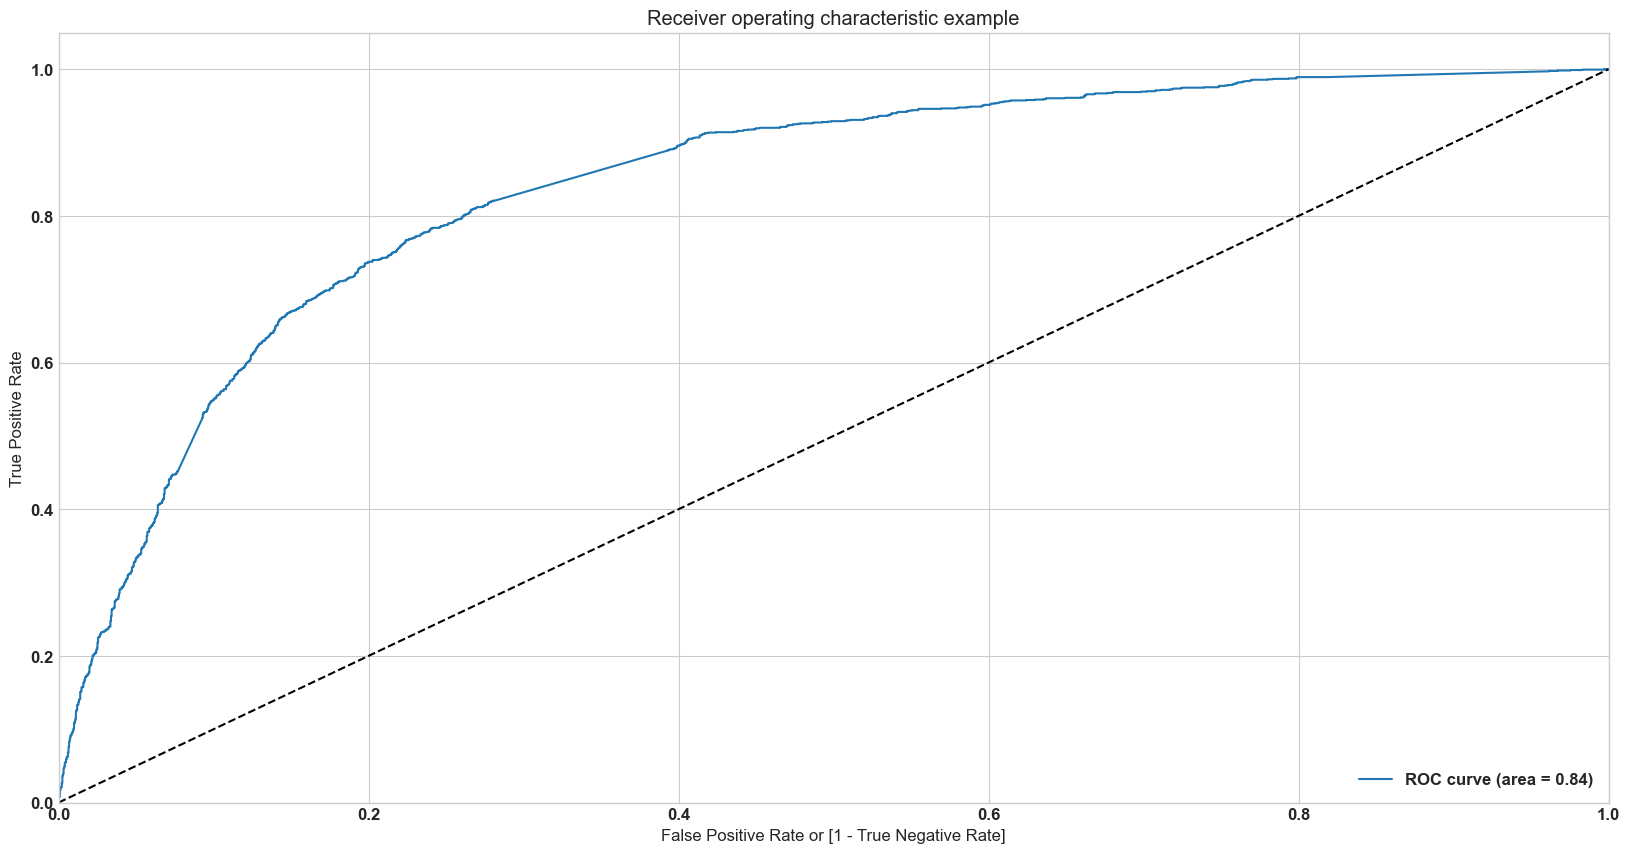

Accuracy 0.7782827074862473
Sensitivity 0.6640625
Specificity 0.8537941994437823
Precision 0.7501697216564833
Recall 0.6640625
F1 Score 0.704494740197641
[[2149  368]
 [ 559 1105]]


In [59]:
col_8 = col_7.drop('Lead Origin_Landing Page Submission', 1)
#model8
conf_8 = build_model(col_8)
print(conf_8)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4181
Model:                            GLM   Df Residuals:                     4173
Model Family:                Binomial   Df Model:                            7
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2027.5
Date:                Mon, 25 Dec 2023   Deviance:                       4054.9
Time:                        13:29:10   Pearson chi2:                 4.27e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3124
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

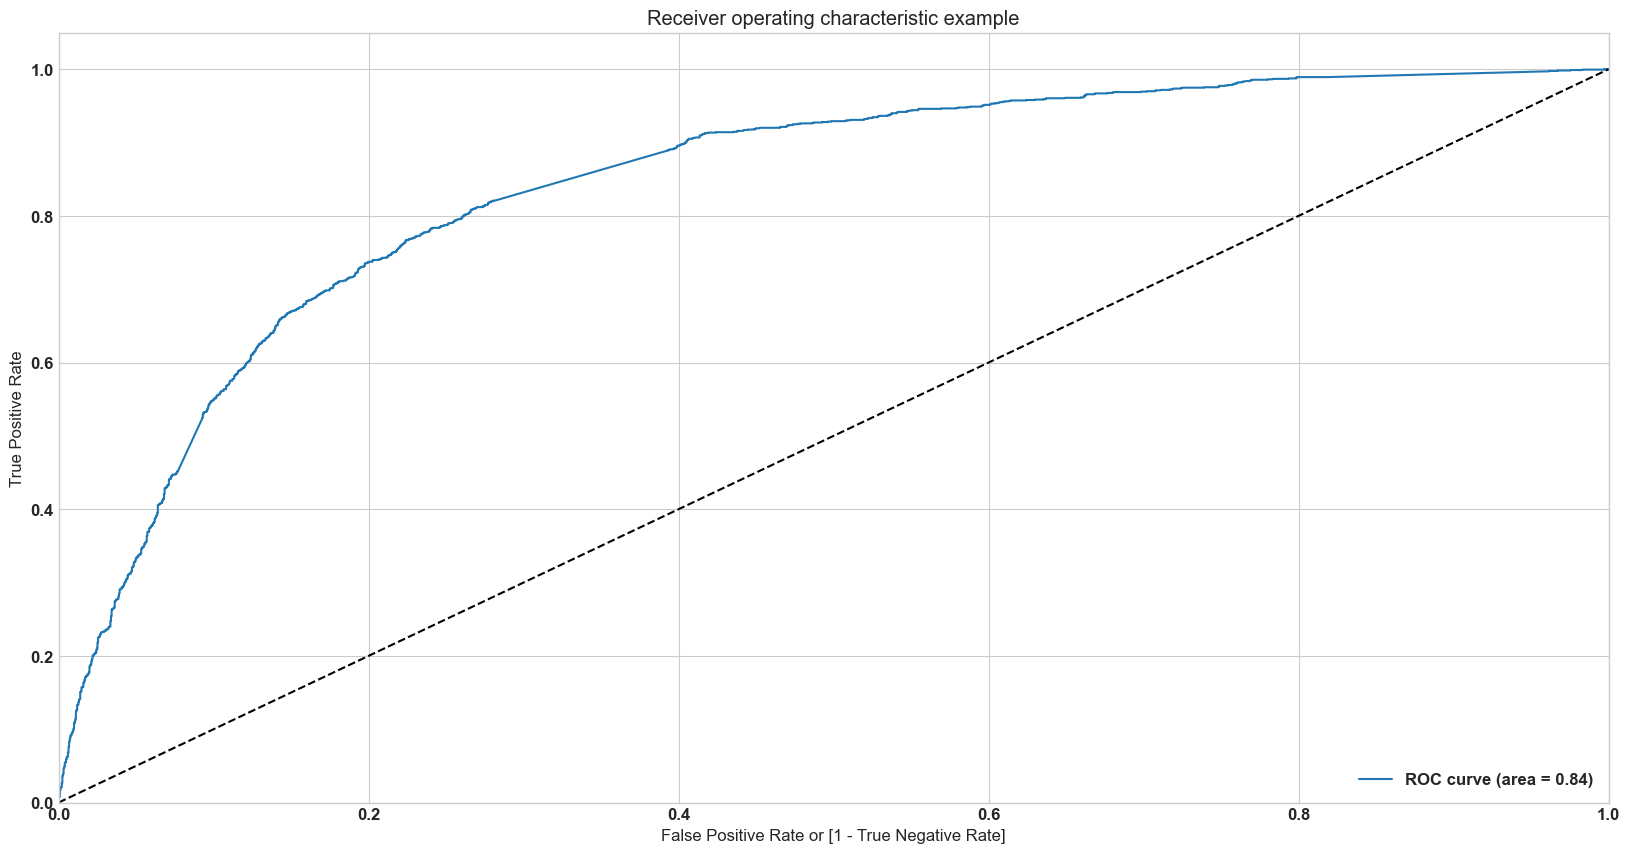

Accuracy 0.7782827074862473
Sensitivity 0.6640625
Specificity 0.8537941994437823
Precision 0.7501697216564833
Recall 0.6640625
F1 Score 0.704494740197641
[[2149  368]
 [ 559 1105]]


In [60]:
col_9 = col_8.drop('Last Notable Activity_Email Marked Spam', 1)
#model9
conf_9 = build_model(col_9)
print(conf_9)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4181
Model:                            GLM   Df Residuals:                     4173
Model Family:                Binomial   Df Model:                            7
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2027.5
Date:                Mon, 25 Dec 2023   Deviance:                       4054.9
Time:                        13:29:24   Pearson chi2:                 4.27e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3124
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

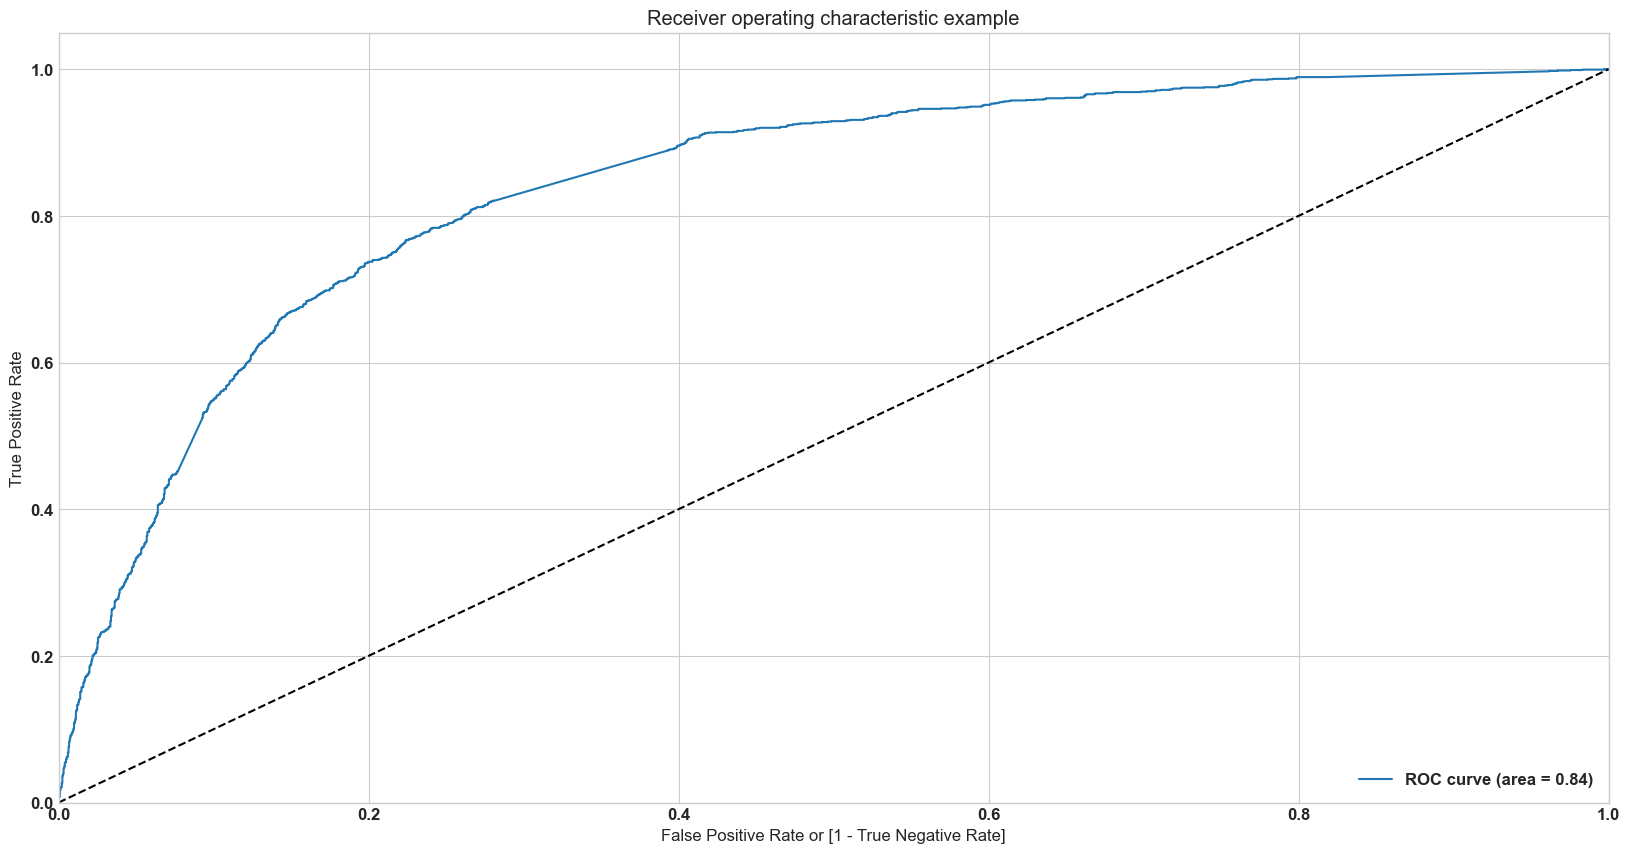

Accuracy 0.7782827074862473
Sensitivity 0.6640625
Specificity 0.8537941994437823
Precision 0.7501697216564833
Recall 0.6640625
F1 Score 0.704494740197641
[[2149  368]
 [ 559 1105]]


In [61]:
col_10 = col_9.drop('Last Activity_Had a Phone Conversation', 1)

#model10
conf_10 = build_model(col_10)
print(conf_10)

In [62]:
# Optimal Cut-off point

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4181
Model:                            GLM   Df Residuals:                     4173
Model Family:                Binomial   Df Model:                            7
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2027.5
Date:                Mon, 25 Dec 2023   Deviance:                       4054.9
Time:                        13:29:53   Pearson chi2:                 4.27e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3124
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

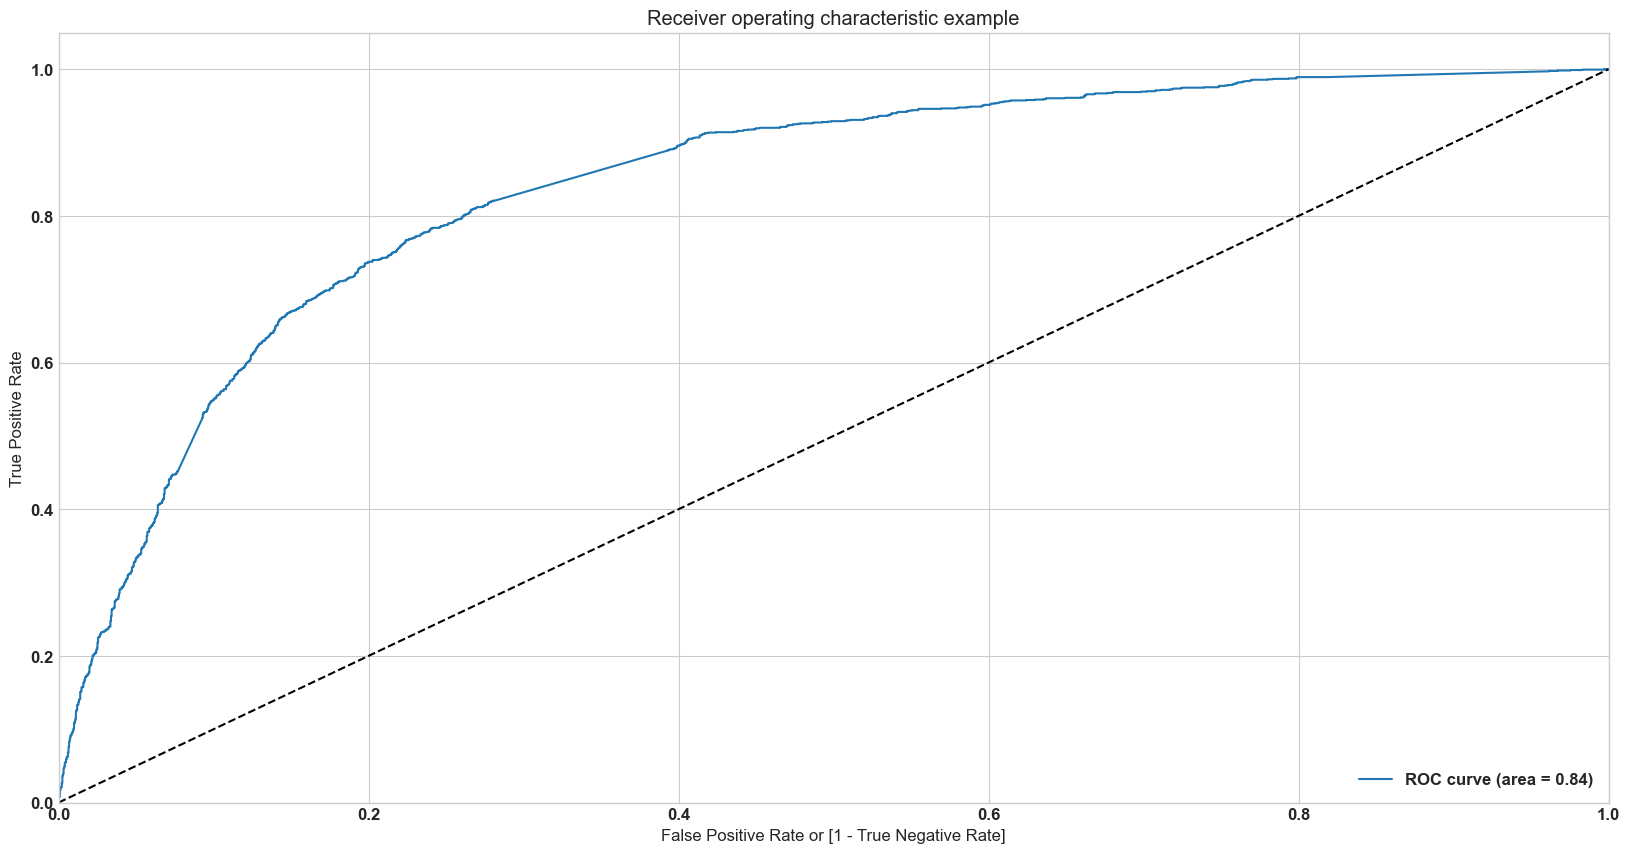

Accuracy 0.7782827074862473
Sensitivity 0.6640625
Specificity 0.8537941994437823
Precision 0.7501697216564833
Recall 0.6640625
F1 Score 0.704494740197641


In [63]:
y_train_pred_final=build_model(col_10)

In [64]:
X_train_sm = sm.add_constant(X_train[col_10])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4181
Model:                            GLM   Df Residuals:                     4173
Model Family:                Binomial   Df Model:                            7
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2027.5
Date:                Mon, 25 Dec 2023   Deviance:                       4054.9
Time:                        13:30:09   Pearson chi2:                 4.27e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3124
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [65]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number
0,0,0.289405,1621
1,0,0.583484,3313
2,0,0.026067,8444
3,0,0.362886,8003
4,1,0.882825,5783


In [66]:
number=[float(x)/10 for x in range(10)]
for i in number:
    y_train_pred_final[i]=y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.289405,1621,1,1,1,0,0,0,0,0,0,0
1,0,0.583484,3313,1,1,1,1,1,1,0,0,0,0
2,0,0.026067,8444,1,0,0,0,0,0,0,0,0,0
3,0,0.362886,8003,1,1,1,1,0,0,0,0,0,0
4,1,0.882825,5783,1,1,1,1,1,1,1,1,1,0


     prob  accuracy     sensi     speci
0.0   0.0  0.397991  1.000000  0.000000
0.1   0.1  0.535757  0.978966  0.242749
0.2   0.2  0.686199  0.922476  0.529996
0.3   0.3  0.760344  0.814904  0.724275
0.4   0.4  0.771586  0.740986  0.791816
0.5   0.5  0.778283  0.664062  0.853794
0.6   0.6  0.762736  0.569712  0.890346
0.7   0.7  0.722554  0.399639  0.936035
0.8   0.8  0.690983  0.282452  0.961065
0.9   0.9  0.645061  0.125601  0.988478


<Axes: xlabel='prob'>

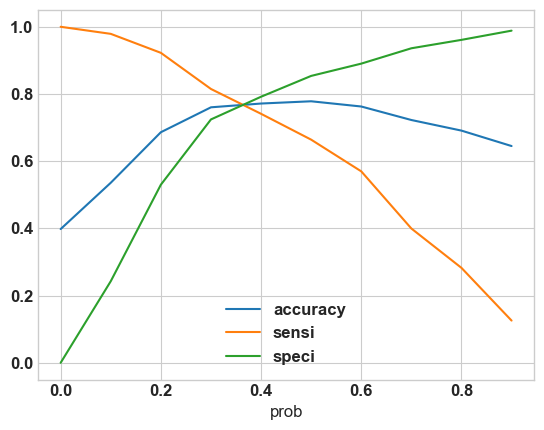

In [67]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num_col = [float(x)/10 for x in range(10)]
for i in num_col:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)
#plot
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

In [68]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.42 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.289405,1621,1,1,1,0,0,0,0,0,0,0,0
1,0,0.583484,3313,1,1,1,1,1,1,0,0,0,0,1
2,0,0.026067,8444,1,0,0,0,0,0,0,0,0,0,0
3,0,0.362886,8003,1,1,1,1,0,0,0,0,0,0,0
4,1,0.882825,5783,1,1,1,1,1,1,1,1,1,0,1


In [69]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[2030,  487],
       [ 453, 1211]], dtype=int64)

In [70]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives


print(f"sensitivity: {round(TP / float(TP+FN),2)*100 }%")
print(f"specificity: {round(TN / float(TN+FP),2)*100 }%")

print(f"precision: {round(TP / float(TP+FP),2)*100 }%")
print(f"recall: {round(TP / float(TP+FN),2)*100 }%")

print(f"f1 score: {round(2*TP / float(2*TP+FP+FN),2)*100 }%")

sensitivity: 73.0%
specificity: 81.0%
precision: 71.0%
recall: 73.0%
f1 score: 72.0%


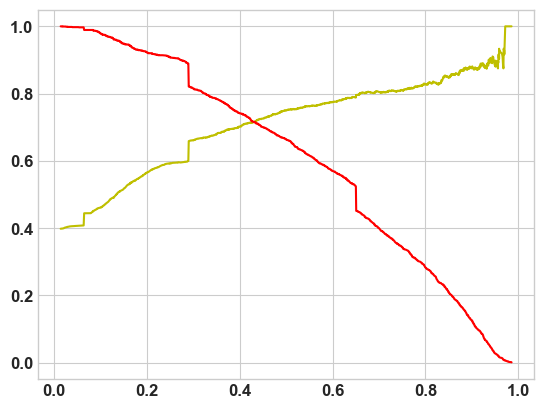

In [72]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)
plt.plot(thresholds, p[:-1], "y-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [73]:
X_test[col_10].head()
X_test_sm = sm.add_constant(X_test[col_10])
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

6955    0.119575
2294    0.031998
2956    0.662108
5633    0.650293
3124    0.454039
8231    0.296585
3725    0.917456
5519    0.650293
1904    0.087705
2083    0.650293
dtype: float64

In [74]:
y_pred_1 = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

# Putting Prospect ID to index
y_test_df['Lead Number'] = y_test_df.index

# Removing index for both dataframes to append them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

# Let's see the head of y_pred_final
y_pred_final["final_predicted"] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.3 else 0)
y_pred_final.head()

,Converted,Lead Number,Converted_Prob,final_predicted
0,0,6955,0.119575,0
1,0,2294,0.031998,0
2,1,2956,0.662108,1
3,1,5633,0.650293,1
4,0,3124,0.454039,1


In [75]:
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.76171875

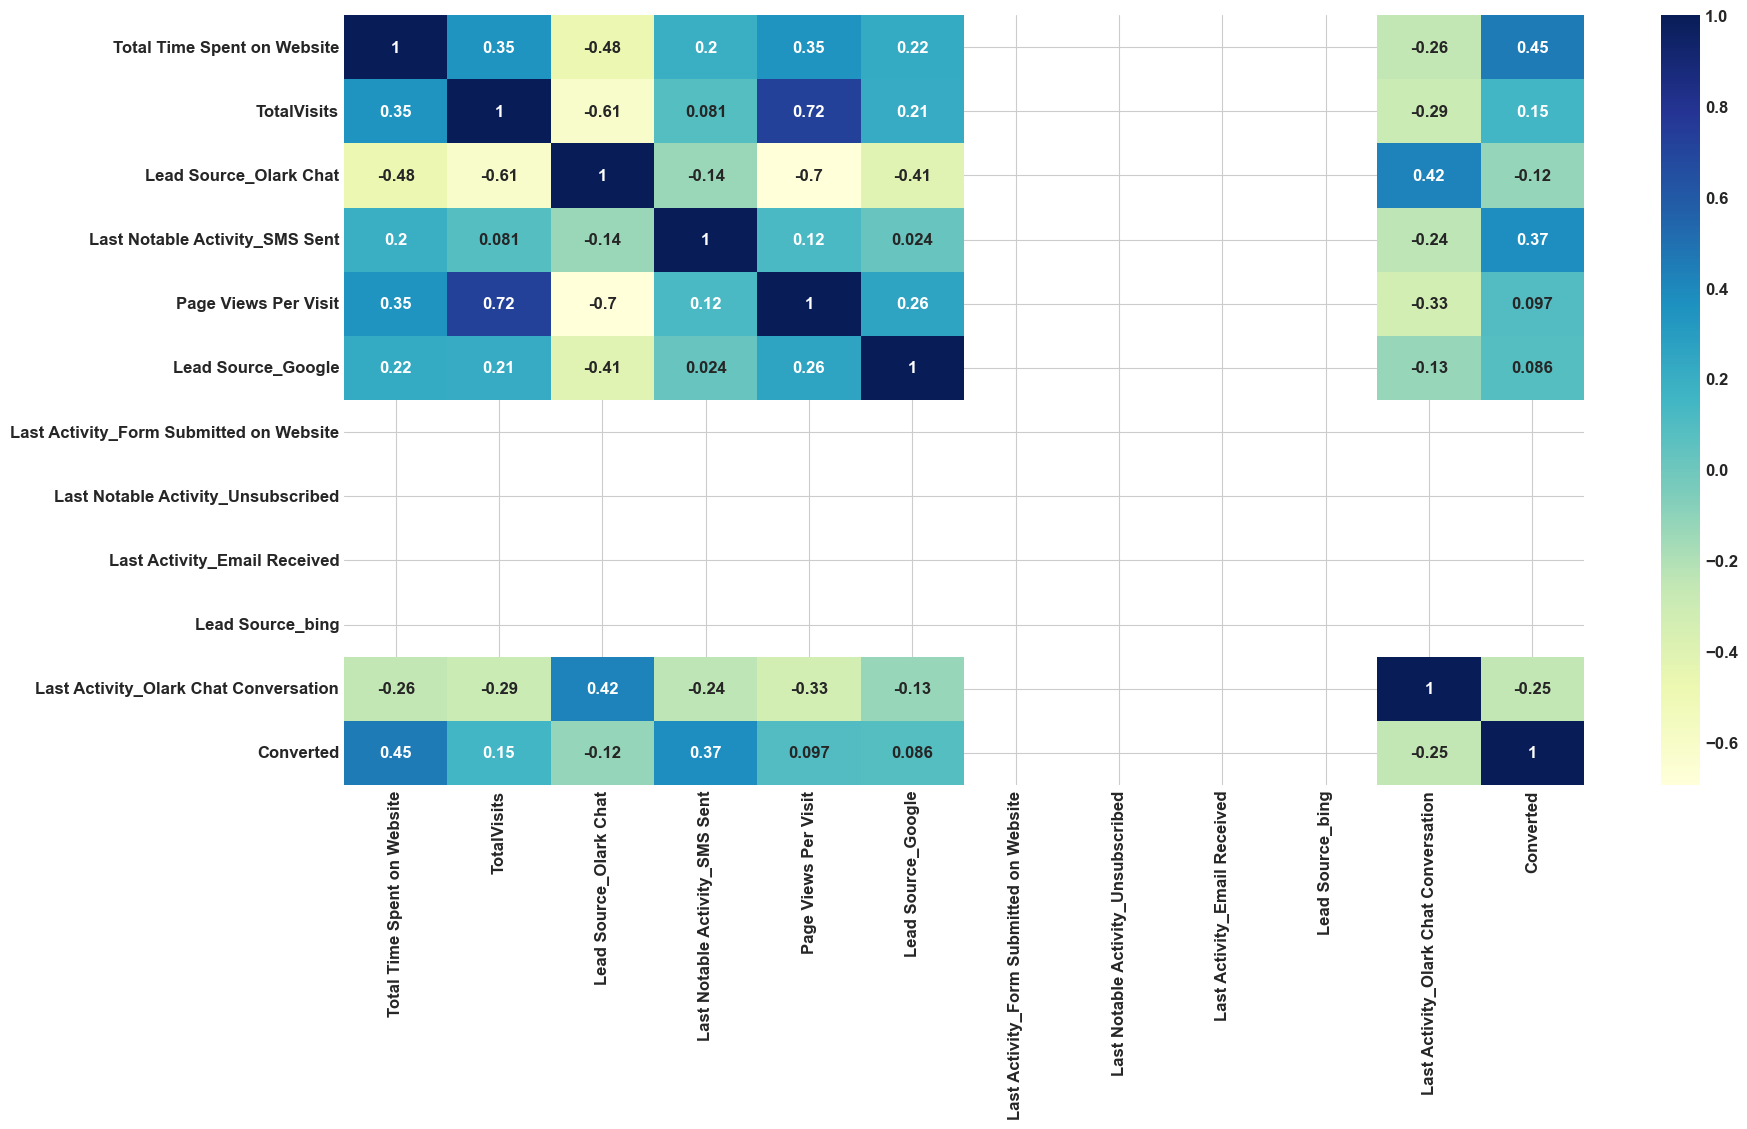

In [77]:
#check the correlation matrix
col_3 = col_10.append(pd.Index(['Converted']))
# col_10 columns in dataframe x_edu_df
df_final = df2[col_3]

#corelation matrix
corr = df_final.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corr, annot = True,cmap="YlGnBu")
plt.show()